# Explore the data

This jupyter notebook is dedicated to exploring the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import colors
import numpy as np
import operator

## 1. Open and view all the files

In [2]:
GO=pd.read_csv('../data/GO_Processes_In_Resistance.csv')
PF_genes=pd.read_csv('../data/PFalciparum_Gene_GOterms.csv')
train=pd.read_csv('../data/SubCh1_TrainingData.csv')
test=pd.read_csv('../data/SubCh1_TestData.csv')

In [3]:
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance
0,GO:0020033,antigenic variation,0
1,GO:0098609,cell-cell adhesion,1
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1
4,GO:0042000,translocation of peptides or proteins into host,0


In [4]:
GO.shape

(539, 3)

In [5]:
PF_genes.head()

,Gene ID,Genomic Location (Gene),Product Description,Computed GO Component IDs,Computed GO Components,Computed GO Function IDs,Computed GO Functions,Computed GO Process IDs,Computed GO Processes,Curated GO Component IDs,Curated GO Components,Curated GO Function IDs,Curated GO Functions,Curated GO Process IDs,Curated GO Processes,EC numbers,EC numbers from OrthoMCL
0,PF3D7_0100100,"Pf3D7_01_v3:29,510..37,126(+)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,GO:0020002;GO:0020030,host cell plasma membrane;infected host cell s...,GO:0050839,cell adhesion molecule binding,GO:0020033;GO:0098609;GO:0020035;GO:0020013,antigenic variation;cell-cell adhesion;cytoadh...,NaN,NaN
1,PF3D7_0100200,"Pf3D7_01_v3:38,982..40,207(-)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,NaN,NaN,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
2,PF3D7_0100300,"Pf3D7_01_v3:42,367..46,507(-)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PF3D7_0100400,"Pf3D7_01_v3:50,363..51,636(+)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,GO:0046812,host cell surface binding,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
4,PF3D7_0100500,"Pf3D7_01_v3:53,169..53,280(-)","erythrocyte membrane protein 1 (PfEMP1), exon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
PF_genes.shape

(5758, 17)

In [7]:
train.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [8]:
train.shape

(272, 5546)

In [9]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


In [10]:
test.shape

(200, 5546)

(array([ 2.,  5.,  8., 17., 34., 49., 61., 48., 34., 14.]),
 array([-4.88476204, -4.4575967 , -4.03043136, -3.60326603, -3.17610069,
        -2.74893535, -2.32177001, -1.89460467, -1.46743934, -1.040274  ,
        -0.61310866]),
 <a list of 10 Patch objects>)

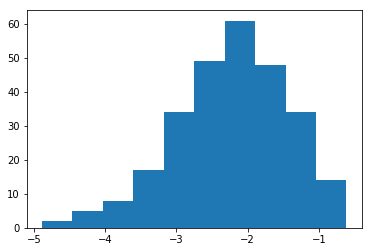

In [11]:
plt.hist(train["PF3D7_0100100"])

In [12]:
list_A = [1, 2, 3]
list_B = [3, 4, 5]
intersection = list( set(list_A) & set(list_B))
intersection

[3]

## 2. Find important genes

"""
SECTION DESCRIPTION HERE
"""

### 2.1 Add column "gene_count" and "genes" to the GO dataframe

From the dataframe PF_genes, extract the "Curated GO Process ID" and add it to the GO dataframe by matching them to the column "GO Process ID"

### 2.1.1 Create new DataFrame Gene_to_Curated_GO_Process_ID_df

In [3]:
Gene_to_Go_Process_df=pd.DataFrame({'Gene_ID':PF_genes['Gene ID'],\
                                               'Curated_Go_Process_IDs':PF_genes['Curated GO Process IDs']})
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,GO:0020033;GO:0098609;GO:0020035;GO:0020013
1,PF3D7_0100200,GO:0020033;GO:0020035;GO:0020013
2,PF3D7_0100300,NaN
3,PF3D7_0100400,GO:0020033;GO:0020035;GO:0020013
4,PF3D7_0100500,NaN
5,PF3D7_0100600,GO:0020033
6,PF3D7_0100700,NaN
7,PF3D7_0100800,GO:0020033;GO:0020035;GO:0020013
8,PF3D7_0100900,GO:0020033;GO:0020035;GO:0020013
9,PF3D7_0101000,GO:0020033;GO:0020035;GO:0020013


In [4]:
Gene_to_Go_Process_df.dropna(inplace=True)
Gene_to_Go_Process_df['Curated_Go_Process_IDs']=\
    Gene_to_Go_Process_df['Curated_Go_Process_IDs']\
    .str.split(';', n=-1)

In [5]:
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,"[GO:0020033, GO:0098609, GO:0020035, GO:0020013]"
1,PF3D7_0100200,"[GO:0020033, GO:0020035, GO:0020013]"
3,PF3D7_0100400,"[GO:0020033, GO:0020035, GO:0020013]"
5,PF3D7_0100600,[GO:0020033]
7,PF3D7_0100800,"[GO:0020033, GO:0020035, GO:0020013]"
8,PF3D7_0100900,"[GO:0020033, GO:0020035, GO:0020013]"
9,PF3D7_0101000,"[GO:0020033, GO:0020035, GO:0020013]"
12,PF3D7_0101300,[GO:0042000]
15,PF3D7_0101600,"[GO:0020033, GO:0020035, GO:0020013]"
17,PF3D7_0101800,[GO:0020013]


### 2.1.2 Reorganize Gene_to_Go_Process_df to map each Curated_Go_Process_ID to the corresponding Gene_ID

In [6]:
GO_Process_to_Gene_list=[]

for idx, row in Gene_to_Go_Process_df.iterrows():
    for GO_Process in row['Curated_Go_Process_IDs']:
        GO_Process_to_Gene_list.append([GO_Process,row['Gene_ID']])

GO_Process_to_Gene_df=pd.DataFrame(GO_Process_to_Gene_list, 
                                   columns=['Curated_Go_Process_IDs','Gene_ID'])

In [7]:
GO_Process_to_Gene_df.sort_values('Curated_Go_Process_IDs', 
                                 inplace=True)
GO_Process_to_Gene_df.reset_index(drop=True,inplace=True)

In [8]:
GO_Process_to_Gene_df=GO_Process_to_Gene_df\
.groupby('Curated_Go_Process_IDs')['Gene_ID']\
.apply(list).to_frame()

In [9]:
GO_Process_to_Gene_df.reset_index(inplace=True)

In [10]:
GO_Process_to_Gene_df.head(10)

,Curated_Go_Process_IDs,Gene_ID
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,..."
1,GO:0000042,[PF3D7_0621350]
2,GO:0000045,[PF3D7_1015900]
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]"
4,GO:0000070,[PF3D7_1130700]
5,GO:0000079,[PF3D7_1304700]
6,GO:0000165,[PF3D7_1113900]
7,GO:0000184,[PF3D7_1005500]
8,GO:0000209,[PF3D7_1211800]
9,GO:0000226,"[PF3D7_1008700, PF3D7_0803700]"


### 2.1.3 Add the column Gene_Count to the GO_Process_to_Gene_df

In [11]:
Gene_Count=[len(gene_list) for gene_list in list(GO_Process_to_Gene_df["Gene_ID"])]
GO_Process_to_Gene_df['Gene_Count']=Gene_Count
GO_Process_to_Gene_df.head()

,Curated_Go_Process_IDs,Gene_ID,Gene_Count
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,...",9
1,GO:0000042,[PF3D7_0621350],1
2,GO:0000045,[PF3D7_1015900],1
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]",2
4,GO:0000070,[PF3D7_1130700],1


### 2.1.4 Merge the DataFrames Go and GO_Process_IDs by the GO_Process column

In [12]:
GO=pd.merge(GO,GO_Process_to_Gene_df,left_on='GO Process ID',
             right_on='Curated_Go_Process_IDs')
GO.drop('Curated_Go_Process_IDs', axis=1, inplace=True)
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0020033,antigenic variation,0,"[PF3D7_0100600, PF3D7_1254000, PF3D7_1200100, ...",202
1,GO:0098609,cell-cell adhesion,1,"[PF3D7_1041300, PF3D7_0412700, PF3D7_1100100, ...",57
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1,"[PF3D7_0200600, PF3D7_1300200, PF3D7_0413200, ...",165
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1,"[PF3D7_1101100, PF3D7_1200600, PF3D7_1200100, ...",190
4,GO:0042000,translocation of peptides or proteins into host,0,"[PF3D7_0101300, PF3D7_0114100, PF3D7_0713100, ...",10


### 2.2 Find the distribution of Gene_Count

Text(0.5, 1.0, 'Gene_Count distribution: All GO Processes')

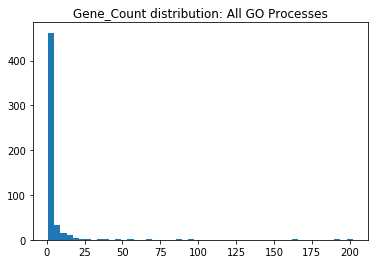

In [13]:
plt.hist(GO['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: All GO Processes')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

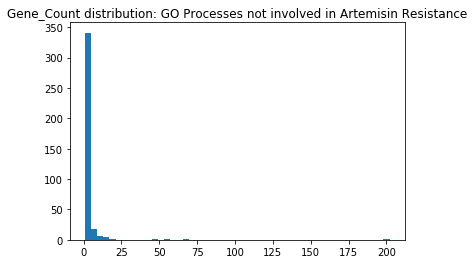

In [14]:
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==0]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes involved in Artemisin Resistance')

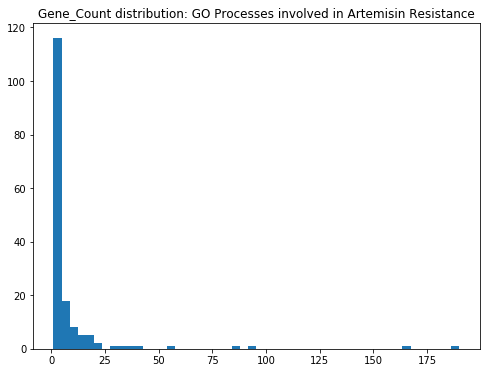

In [15]:
plt.figure(figsize=(8,6))
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==1]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes involved in Artemisin Resistance')

### 2.3 Filter the GO DataFrame

Keep the Go Processes Involved in Artemisin Resistance and Gene_Count <= 25

In [16]:
GO=GO[GO['IsInvolvedInArtemisinResistance']==1].reset_index(drop=True)
GO=GO[GO['Gene_Count']<=25].reset_index(drop=True)

In [17]:
GO.head(10)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


### 2.4 Create a list of unique genes involved in Artemisin resistance

In [18]:
result = set()
for row in range(len(GO)):
    result = result | set(GO["Gene_ID"][row])
result = list(result)
print("Total of genes including after filtering: {}".format(len(result)))

Total of genes including after filtering: 489


### Save final gene list to file

In [29]:
f = open("../data/Important_PF_genes.txt", "w")
f.write("\n".join(result))
f.close()

### 2.5 Filter the train DataFrame 

Keep only the important genes found in previous steps.

In [19]:
genes_to_keep = set(list(train.columns)) & set(result)
genes_to_keep = list(genes_to_keep)
columns_to_keep = list(train.columns)[0:5] + \
[list(train.columns)[-1]] + genes_to_keep
columns_to_keep

['Sample_Name',
 'Isolate',
 'Timepoint',
 'Treatment',
 'BioRep',
 'DHA_IC50',
 'PF3D7_0826100',
 'PF3D7_1105500',
 'PF3D7_1426300',
 'PF3D7_1116600',
 'PF3D7_1136900',
 'PF3D7_1438100',
 'PF3D7_0918300',
 'PF3D7_1212700',
 'PF3D7_0529500',
 'PF3D7_1013900',
 'PF3D7_1420600',
 'PF3D7_0616000',
 'PF3D7_1216200',
 'PF3D7_1477800',
 'PF3D7_1213600',
 'PF3D7_0211600',
 'PF3D7_0529200',
 'PF3D7_0207500',
 'PF3D7_1472100',
 'PF3D7_1342100',
 'PF3D7_1426500',
 'PF3D7_0309600',
 'PF3D7_0718500',
 'PF3D7_1317900',
 'PF3D7_1445400',
 'PF3D7_1134800',
 'PF3D7_1226600',
 'PF3D7_1209300',
 'PF3D7_1207300',
 'PF3D7_1231100',
 'PF3D7_0525400',
 'PF3D7_0822700',
 'PF3D7_1324700',
 'PF3D7_1361400',
 'PF3D7_1431600',
 'PF3D7_0208200',
 'PF3D7_1450100',
 'PF3D7_0629500',
 'PF3D7_0504600',
 'PF3D7_1032500',
 'PF3D7_1345700',
 'PF3D7_0719500',
 'PF3D7_1338300',
 'PF3D7_1146000',
 'PF3D7_1123400',
 'PF3D7_0827100',
 'PF3D7_0527500',
 'PF3D7_0515300',
 'PF3D7_1364600',
 'PF3D7_1248900',
 'PF3D7_1241600',
 '

## Save genes_to_keep to file

In [31]:
f=open('../data/genes_to_keep.txt','w')
f.write("\n".join(genes_to_keep))
f.close()

In [20]:
filtered_train = train[columns_to_keep]

In [33]:
filtered_train.head(10)

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,DHA_IC50,PF3D7_1320400,PF3D7_1330600,PF3D7_0718500,PF3D7_1214400,...,PF3D7_0207500,PF3D7_0910600,PF3D7_1313000,PF3D7_1238800,PF3D7_1246200,PF3D7_0820700,PF3D7_1015900,PF3D7_1220900,PF3D7_0815700,PF3D7_0806400
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,2.177,0.811261,0.234425,-1.647463,1.203883,...,0.613365,-0.781720,-0.019802,-0.143005,0.051467,0.153865,-0.124743,0.422604,0.749964,0.117336
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,2.177,-0.464217,-0.214348,0.542065,1.295826,...,-1.666721,0.442324,0.296930,0.003313,-0.123138,-0.974436,-0.665616,-0.470340,-0.197346,-1.556456
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,2.177,-0.657436,-0.445691,-0.048734,0.770902,...,-1.658480,0.383714,0.299090,-0.390698,-0.510052,-1.190595,0.346398,-0.695744,-0.214700,-1.822355
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,2.177,-0.314114,-0.375166,0.357761,1.200006,...,-0.764933,0.323929,0.576187,0.015921,-0.794074,-0.560563,-0.460713,-0.374961,-0.421382,-0.886058
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,2.177,0.013216,1.161601,0.402466,0.751629,...,0.560752,0.075808,1.329995,-0.678934,-1.238640,0.042085,-0.187515,0.101966,-0.223751,-1.780431
5,isolate_01.6HR.DHA.BRep2,isolate_01,6HR,DHA,BRep2,2.177,0.137973,-0.075976,-0.462888,1.263448,...,0.718710,-0.064076,0.035879,0.043717,-0.247294,-0.001243,-1.053976,-0.491056,-0.145747,-0.473629
6,isolate_01.6HR.UT.BRep1,isolate_01,6HR,UT,BRep1,2.177,-0.572304,0.529349,0.409518,0.765087,...,-0.504437,-0.016644,0.618683,-0.115892,-1.790009,-0.168681,-0.062601,-0.793802,-0.029913,-1.560380
7,isolate_01.6HR.UT.BRep2,isolate_01,6HR,UT,BRep2,2.177,-1.131980,-0.518168,-0.794880,0.997191,...,-0.614485,1.190897,0.012606,0.862010,-0.069687,-1.063909,0.104969,-0.395877,-0.266391,-1.161585
8,isolate_02.24HR.DHA.BRep1,isolate_02,24HR,DHA,BRep1,1.697,-0.480583,-0.220194,-0.211317,1.148677,...,0.491193,0.279054,0.190456,0.097660,-0.388573,-0.523694,-0.664533,-0.531404,-0.797412,-0.959470
9,isolate_02.24HR.DHA.BRep2,isolate_02,24HR,DHA,BRep2,1.697,0.613832,-0.065395,0.324138,0.710805,...,-1.880632,1.086894,0.252974,0.141553,-1.968344,-1.124864,-1.192843,-0.497300,0.673176,-0.595464


## 3. Create new train DataFrame with engineered features

In [21]:
aggregated_means_train = filtered_train.groupby(["Isolate","Timepoint","Treatment"]).mean()

In [22]:
aggregated_means_train.head(10)

DHA_IC50  PF3D7_0826100  PF3D7_1105500  \
Isolate    Timepoint Treatment                                           
isolate_01 24HR      DHA           2.177      -0.011140      -0.751832   
                     UT            2.177       0.296746      -0.074193   
           6HR       DHA           2.177      -0.057638      -0.535148   
                     UT            2.177       0.634411      -0.298802   
isolate_02 24HR      DHA           1.697       0.386986      -0.429410   
                     UT            1.697      -0.022066      -0.745992   
           6HR       DHA           1.697      -0.070738      -0.345034   
                     UT            1.697       0.068315      -1.112137   
isolate_03 24HR      DHA           1.799       0.345598       0.025384   
                     UT            1.799       0.046740      -0.808713   

                                PF3D7_1426300  PF3D7_1116600  PF3D7_1136900  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA             0.520642       0.619634       0.438439   
                     UT             -0.236151       0.179729      -0.041432   
           6HR       DHA            -0.567076       0.051632       0.213367   
                     UT             -0.337092      -0.254699       0.082546   
isolate_02 24HR      DHA            -0.291758       0.028501       0.560809   
                     UT             -0.006670       0.084338       0.702478   
           6HR       DHA            -0.133882       0.246090       0.535376   
                     UT              0.061960       0.058050       0.477156   
isolate_03 24HR      DHA            -0.324502       0.071490       0.034230   
                     UT              0.298509       0.306819       0.585593   

                                PF3D7_1438100  PF3D7_0918300  PF3D7_1212700  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA            -0.524654      -1.458696       0.017018   
                     UT             -0.259973      -0.998150       0.265312   
           6HR       DHA            -0.935407      -2.215659       0.119796   
                     UT             -0.595701      -1.083851       0.395421   
isolate_02 24HR      DHA            -0.530602      -0.822519       0.366731   
                     UT             -0.652072      -1.455641       0.103255   
           6HR       DHA            -0.283075      -1.246877       0.128879   
                     UT             -0.509265      -1.817467       0.307117   
isolate_03 24HR      DHA            -0.510400      -1.063474       0.095875   
                     UT             -0.461834      -1.510274       0.089258   

                                PF3D7_0529500  ...  PF3D7_1223400  \
Isolate    Timepoint Treatment                 ...                  
isolate_01 24HR      DHA            -1.464999  ...      -0.921240   
                     UT             -0.264508  ...      -0.026527   
           6HR       DHA            -0.423487  ...      -0.273158   
                     UT              0.122811  ...       0.593962   
isolate_02 24HR      DHA             0.055511  ...       0.231965   
                     UT             -0.399406  ...      -0.198109   
           6HR       DHA            -0.339342  ...      -0.032586   
                     UT             -0.226038  ...      -0.134548   
isolate_03 24HR      DHA            -0.210300  ...      -0.018097   
                     UT             -0.777386  ...      -0.589321   

                                PF3D7_1210100  PF3D7_0317800  PF3D7_0208600  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA             0.393135      -0.499223       0.209645   
                     UT              0.009279      -0.442210      -0.312037   
           6HR       DHA             0.198650      -0.315324       0.653558   
                     

In [23]:
aggregated_means_train.index[5]


('isolate_02', '24HR', 'UT')

In [24]:
genes_list=genes_to_keep

### 3.1 Flatten the aggregated_means_train data frame 

We do this so that each row is an isolate and the different timepoints and treatments become columns

**Before**
```python

| Isolate  | Timepoint | Treatment | PF3D7_0107600 |
|----------|-----------|-----------|---------------|
|isolate_01|       24Hr|        DHA|         value1|
|          |           |         UT|         value2|
|          |        6Hr|        DHA|         value3|
|          |           |         UT|         value4|
```

**After**
```python
print(flat_train)

| Isolate  | PF3D7_0107600_24HR_DHA | PF3D7_0107600_24HR_UT | PF3D7_0107600_6HR_DHA | PF3D7_0107600_6HR_UT |
|----------|------------------------|-----------------------|-----------------------|----------------------|
|isolate_01|                  value1|                 value2|                 value3|                value4|
```

In [25]:
gene_dict={}
isolate_comb_list=['_24HR_DHA','_24HR_UT','_6HR_DHA','_6HR_UT']
for gene in genes_list:
    gene_dict[gene]=[gene+comb for comb in isolate_comb_list]

In [26]:
gene_dict

{'PF3D7_0826100': ['PF3D7_0826100_24HR_DHA',
  'PF3D7_0826100_24HR_UT',
  'PF3D7_0826100_6HR_DHA',
  'PF3D7_0826100_6HR_UT'],
 'PF3D7_1105500': ['PF3D7_1105500_24HR_DHA',
  'PF3D7_1105500_24HR_UT',
  'PF3D7_1105500_6HR_DHA',
  'PF3D7_1105500_6HR_UT'],
 'PF3D7_1426300': ['PF3D7_1426300_24HR_DHA',
  'PF3D7_1426300_24HR_UT',
  'PF3D7_1426300_6HR_DHA',
  'PF3D7_1426300_6HR_UT'],
 'PF3D7_1116600': ['PF3D7_1116600_24HR_DHA',
  'PF3D7_1116600_24HR_UT',
  'PF3D7_1116600_6HR_DHA',
  'PF3D7_1116600_6HR_UT'],
 'PF3D7_1136900': ['PF3D7_1136900_24HR_DHA',
  'PF3D7_1136900_24HR_UT',
  'PF3D7_1136900_6HR_DHA',
  'PF3D7_1136900_6HR_UT'],
 'PF3D7_1438100': ['PF3D7_1438100_24HR_DHA',
  'PF3D7_1438100_24HR_UT',
  'PF3D7_1438100_6HR_DHA',
  'PF3D7_1438100_6HR_UT'],
 'PF3D7_0918300': ['PF3D7_0918300_24HR_DHA',
  'PF3D7_0918300_24HR_UT',
  'PF3D7_0918300_6HR_DHA',
  'PF3D7_0918300_6HR_UT'],
 'PF3D7_1212700': ['PF3D7_1212700_24HR_DHA',
  'PF3D7_1212700_24HR_UT',
  'PF3D7_1212700_6HR_DHA',
  'PF3D7_1212700_6H

In [27]:
isolates_list=aggregated_means_train.index.get_level_values(0)
isolates_list=list(dict.fromkeys(isolates_list))
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

### Save isolates_list to file

In [41]:
f = open("../data/isolates.txt", "w")
f.write("\n".join(isolates_list))
f.close()

In [28]:
flat_train=pd.DataFrame()
genes=[]
for gene in genes_list:
    temp_list=[]
    for isolate in isolates_list:
        temp_list.append(aggregated_means_train.loc[isolate][gene].tolist())
    flat_train=pd.concat([flat_train,pd.DataFrame(data=temp_list,columns=gene_dict[gene])],axis=1)



In [29]:
flat_train.index=isolates_list
flat_train.head(10)

,PF3D7_0826100_24HR_DHA,PF3D7_0826100_24HR_UT,PF3D7_0826100_6HR_DHA,PF3D7_0826100_6HR_UT,PF3D7_1105500_24HR_DHA,PF3D7_1105500_24HR_UT,PF3D7_1105500_6HR_DHA,PF3D7_1105500_6HR_UT,PF3D7_1426300_24HR_DHA,PF3D7_1426300_24HR_UT,...,PF3D7_0729300_6HR_DHA,PF3D7_0729300_6HR_UT,PF3D7_1451100_24HR_DHA,PF3D7_1451100_24HR_UT,PF3D7_1451100_6HR_DHA,PF3D7_1451100_6HR_UT,PF3D7_1015600_24HR_DHA,PF3D7_1015600_24HR_UT,PF3D7_1015600_6HR_DHA,PF3D7_1015600_6HR_UT
isolate_01,-0.011140,0.296746,-0.057638,0.634411,-0.751832,-0.074193,-0.535148,-0.298802,0.520642,-0.236151,...,0.666941,1.174795,-0.376686,0.165248,-0.014262,0.602395,-0.631147,-0.270414,-0.006452,0.016364
isolate_02,0.386986,-0.022066,-0.070738,0.068315,-0.429410,-0.745992,-0.345034,-1.112137,-0.291758,-0.006670,...,0.404612,0.712716,-0.075168,-0.013801,0.112742,0.085208,-0.339757,-0.274046,-0.158893,-0.724395
isolate_03,0.345598,0.046740,0.280995,0.086862,0.025384,-0.808713,-0.029181,-1.233526,-0.324502,0.298509,...,0.870803,0.479488,0.218303,-0.451875,0.049462,-0.183106,0.084297,-0.563216,0.265084,-0.028720
isolate_04,-0.190168,0.359937,0.008028,-0.099482,-0.081137,-0.360753,-0.867384,-0.629086,-0.067102,-0.332493,...,0.473021,0.870542,-0.136708,0.285877,-0.291755,-0.263981,-0.748048,-0.203465,-0.728739,-0.994855
isolate_05,0.566970,-0.044396,0.239984,0.190085,-0.483015,-0.903044,-0.577682,0.091677,-0.434231,0.406083,...,0.731808,1.307097,0.523700,-0.751828,0.266566,0.190381,-0.036358,-1.000401,-0.602219,-0.144627
isolate_06,0.080719,0.023373,0.373825,0.489994,0.224341,0.033734,-0.387687,-0.380426,0.047931,0.006624,...,0.960851,1.074535,0.046074,0.093019,0.352433,0.191244,-0.719747,-0.498175,0.330826,-0.039829
isolate_07,0.202325,0.236180,0.218464,0.706127,-0.656171,-0.047253,0.165682,-0.533512,-0.000809,-0.495518,...,0.489439,1.183291,-0.064372,0.176808,0.409794,0.460211,-1.069146,-0.242151,0.163209,-0.018869
isolate_08,0.536962,0.431063,0.038654,0.294152,-0.196007,0.303366,-0.680897,-0.729441,-0.537899,-0.028539,...,0.704596,1.073917,0.562486,0.518953,-0.036308,0.113722,0.186908,-0.161800,-1.255679,-0.906694
isolate_09,0.192776,-0.236144,-0.083368,0.073898,-0.307747,0.441627,-0.620396,-0.485954,-0.234881,-0.580228,...,0.523498,0.620125,0.127200,-0.563500,-0.428619,0.294716,-0.050117,-0.627591,-0.017383,0.117623
isolate_10,-0.262855,0.124350,-0.015567,-0.011734,0.006799,-0.371706,-0.149561,-0.868081,-0.010448,-0.320502,...,0.600676,0.266524,-0.291887,0.629581,0.363293,-0.204133,-0.793245,-0.532359,0.372808,-0.263693


### 3.2 Clustergram

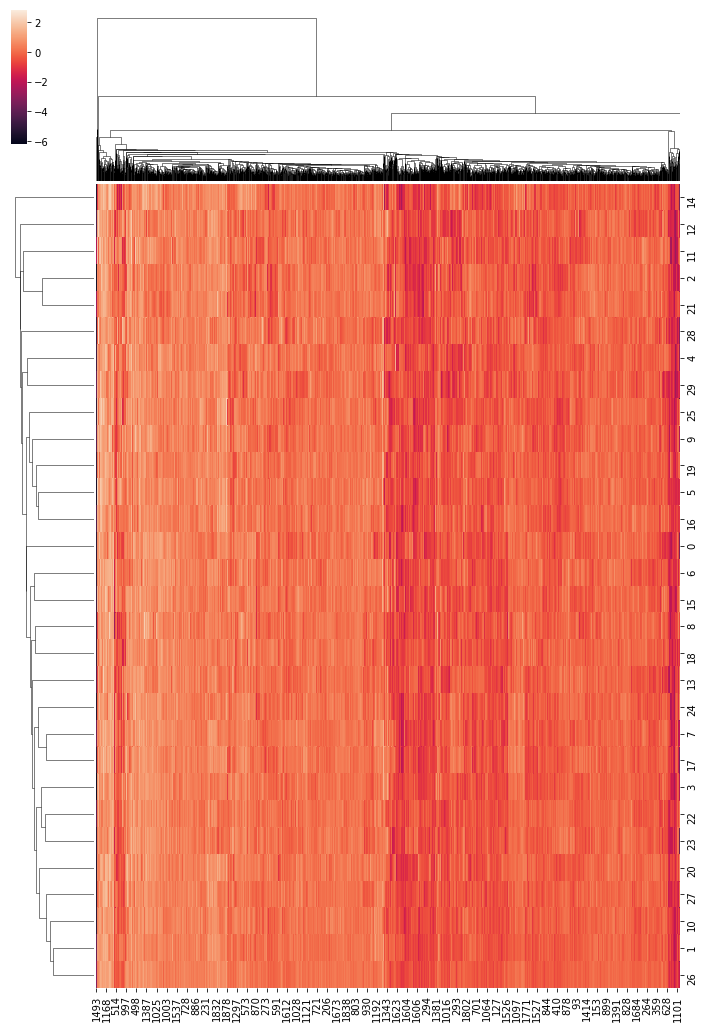

In [44]:
cltr=sn.clustermap(flat_train.values,figsize=(12,18))

In [45]:
reordered_isolates = cltr.dendrogram_row.reordered_ind

In [46]:
flat_IC50=train[["Isolate",'DHA_IC50']].drop_duplicates(keep='first')

flat_IC50.index = list(flat_IC50["Isolate"])

del flat_IC50["Isolate"]
flat_IC50

,DHA_IC50
isolate_01,2.1770
isolate_02,1.6970
isolate_03,1.7990
isolate_04,0.7100
isolate_05,2.0250
isolate_06,1.3670
isolate_07,0.8567
isolate_08,3.4600
isolate_09,1.7650
isolate_10,1.7540


## Save flat_IC50 to file

In [47]:
flat_IC50.to_csv('../data/flat_IC50.csv',sep=',')

In [48]:
flat_IC50.sort_values("DHA_IC50",ascending=False)

,DHA_IC50
isolate_08,3.4600
isolate_24,2.2360
isolate_16,2.2100
isolate_01,2.1770
isolate_05,2.0250
isolate_29,1.9900
isolate_19,1.9060
isolate_20,1.8240
isolate_11,1.8200
isolate_03,1.7990


### 3.3 Add the diferential between each timepoint-treatment combination

Add 4 columns containing the differential between the different timepoints and treatment combinations:

Delta_A=(24HR - 6HR) with DHA

Delta_B=(24HR - 6HR) with UT 

Delta_C=(DHA - UT) after 6HR

Delta_D=(DHA - UT) after 24HR


In [49]:
gene_deltas_dict={}
deltas_list=['_24HR_6HR_DHA','_24_6HR_UT','_DHA_UT_6HR','_DHA_UT_24HR']
for gene in genes_list:
    gene_deltas_dict[gene]=[gene+delta for delta in deltas_list]

In [50]:
gene_deltas_dict

{'PF3D7_1320400': ['PF3D7_1320400_24HR_6HR_DHA',
  'PF3D7_1320400_24_6HR_UT',
  'PF3D7_1320400_DHA_UT_6HR',
  'PF3D7_1320400_DHA_UT_24HR'],
 'PF3D7_1330600': ['PF3D7_1330600_24HR_6HR_DHA',
  'PF3D7_1330600_24_6HR_UT',
  'PF3D7_1330600_DHA_UT_6HR',
  'PF3D7_1330600_DHA_UT_24HR'],
 'PF3D7_0718500': ['PF3D7_0718500_24HR_6HR_DHA',
  'PF3D7_0718500_24_6HR_UT',
  'PF3D7_0718500_DHA_UT_6HR',
  'PF3D7_0718500_DHA_UT_24HR'],
 'PF3D7_1214400': ['PF3D7_1214400_24HR_6HR_DHA',
  'PF3D7_1214400_24_6HR_UT',
  'PF3D7_1214400_DHA_UT_6HR',
  'PF3D7_1214400_DHA_UT_24HR'],
 'PF3D7_0419900': ['PF3D7_0419900_24HR_6HR_DHA',
  'PF3D7_0419900_24_6HR_UT',
  'PF3D7_0419900_DHA_UT_6HR',
  'PF3D7_0419900_DHA_UT_24HR'],
 'PF3D7_1352100': ['PF3D7_1352100_24HR_6HR_DHA',
  'PF3D7_1352100_24_6HR_UT',
  'PF3D7_1352100_DHA_UT_6HR',
  'PF3D7_1352100_DHA_UT_24HR'],
 'PF3D7_0722500': ['PF3D7_0722500_24HR_6HR_DHA',
  'PF3D7_0722500_24_6HR_UT',
  'PF3D7_0722500_DHA_UT_6HR',
  'PF3D7_0722500_DHA_UT_24HR'],
 'PF3D7_1020800': ['

In [51]:
for gene in gene_dict.keys():
    
    state1=gene_dict[gene][0] #gene_24HR_DHA
    state2=gene_dict[gene][1] #gene_24HR_UT
    state3=gene_dict[gene][2] #gene_6HR_DHA
    state4=gene_dict[gene][3] #gene_6HR_UT
    
    delta_A=flat_train[state1]-flat_train[state3]
    delta_B=flat_train[state2]-flat_train[state4]
    delta_C=flat_train[state3]-flat_train[state4]
    delta_D=flat_train[state1]-flat_train[state2]
    
    delta_A_label=gene_deltas_dict[gene][0] #gene_24HR_6HR_DHA
    delta_B_label=gene_deltas_dict[gene][1] #gene_24HR_6HR_UT
    delta_C_label=gene_deltas_dict[gene][2] #gene_DHA_UT_6HR
    delta_D_label=gene_deltas_dict[gene][3] #gene_DHA_UT_24HR
    
    temp_df=pd.DataFrame({delta_A_label:delta_A,delta_B_label:delta_B,delta_C_label:delta_C,delta_D_label:delta_D})
    flat_train=pd.concat([flat_train,temp_df],axis=1)

In [52]:
flat_train.head(10)

,PF3D7_1320400_24HR_DHA,PF3D7_1320400_24HR_UT,PF3D7_1320400_6HR_DHA,PF3D7_1320400_6HR_UT,PF3D7_1330600_24HR_DHA,PF3D7_1330600_24HR_UT,PF3D7_1330600_6HR_DHA,PF3D7_1330600_6HR_UT,PF3D7_0718500_24HR_DHA,PF3D7_0718500_24HR_UT,...,PF3D7_1220900_DHA_UT_6HR,PF3D7_1220900_DHA_UT_24HR,PF3D7_0815700_24HR_6HR_DHA,PF3D7_0815700_24_6HR_UT,PF3D7_0815700_DHA_UT_6HR,PF3D7_0815700_DHA_UT_24HR,PF3D7_0806400_24HR_6HR_DHA,PF3D7_0806400_24_6HR_UT,PF3D7_0806400_DHA_UT_6HR,PF3D7_0806400_DHA_UT_24HR
isolate_01,0.173522,-0.485775,0.075594,-0.852142,0.010038,-0.410429,0.542813,0.005591,-0.552699,0.154514,...,0.400295,0.511484,0.461058,-0.169889,-0.036597,0.594350,0.407470,0.006776,0.233953,0.634646
isolate_02,-0.145452,-0.189030,-0.327004,0.063967,-0.335249,-0.169059,0.063177,-0.325465,0.069231,-0.167599,...,0.305596,-0.119236,0.123746,0.282529,0.056012,-0.102771,-0.017603,0.033233,0.015795,-0.035042
isolate_03,-0.353249,0.329838,-0.643543,0.368027,0.320319,0.060092,0.206895,0.058299,0.373997,-0.166159,...,0.097297,0.449612,0.292624,-0.315906,-1.066707,-0.458178,0.101042,-0.243623,-0.630859,-0.286194
isolate_04,-0.339171,-0.341052,-0.206276,0.118814,-0.272749,-0.470932,-0.252812,-0.183126,-0.097878,0.022824,...,-0.086592,0.339593,0.053116,0.182648,0.403787,0.274255,0.083331,-0.154996,0.290635,0.528962
isolate_05,-0.416375,0.014525,-0.020760,-0.571782,-0.490468,-0.170488,-0.373001,-0.356658,0.446529,-0.304594,...,-0.376797,0.420057,-0.402101,0.165872,0.036859,-0.531114,-0.578189,0.566981,0.245982,-0.899188
isolate_06,-0.303706,-0.433376,-0.282313,0.129008,-0.010468,-0.271969,-0.057691,-0.326087,-0.279823,-0.115528,...,-0.250605,-0.041236,-0.267309,0.260540,0.365210,-0.162640,0.901776,0.089683,-0.571019,0.241074
isolate_07,-0.197943,-0.659852,-0.301984,-0.486287,-0.292907,0.502341,0.066624,-0.649100,0.236396,0.515541,...,1.130734,-0.401333,-0.338751,0.620888,0.570198,-0.389441,-0.095790,0.213427,0.368304,0.059087
isolate_08,-0.238683,-0.651755,-0.015961,-0.159970,-0.276984,-0.335147,-0.189435,-0.403033,0.223780,0.333245,...,-0.030649,-0.066938,0.133222,0.621610,0.147143,-0.341246,-0.610916,-0.199136,-0.012943,-0.424723
isolate_09,-0.298444,-0.362110,0.109804,-0.078608,0.159441,0.310334,0.268617,0.374938,-0.137799,0.334670,...,0.484495,1.209562,-0.157062,-0.259238,0.046592,0.148768,0.115921,0.079010,-0.456724,-0.419813
isolate_10,-0.100092,-0.650257,-0.648226,0.057258,-0.163273,-0.176911,0.115907,0.067834,-0.181401,-0.100180,...,-0.244763,0.639747,0.353487,-0.760254,-1.045852,0.067890,0.014764,-0.674486,-0.664122,0.025128


In [53]:
flat_train.to_csv('../data/flat_train.csv',sep=',')

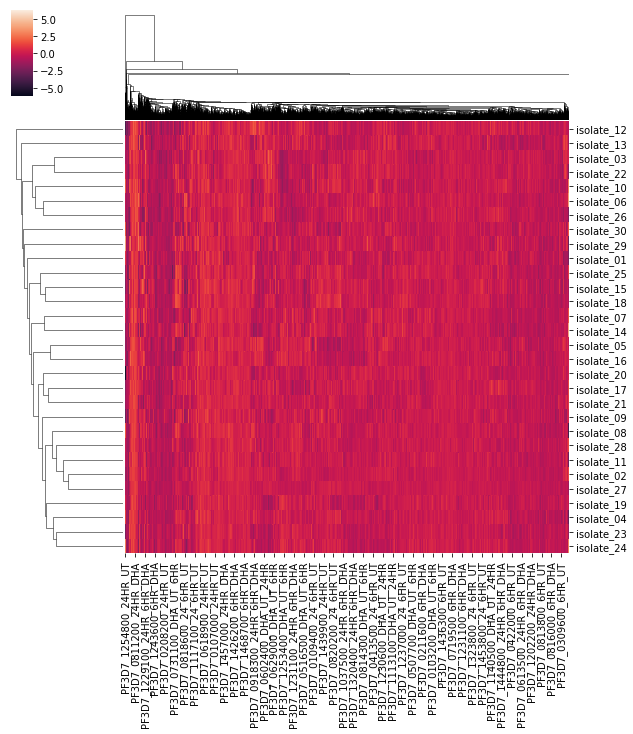

In [54]:
c = sn.clustermap(flat_train)

In [55]:
tmp = flat_train.copy()
tmp = pd.concat([flat_IC50, tmp], axis=1) 

In [56]:
tmp.head()

,DHA_IC50,PF3D7_1320400_24HR_DHA,PF3D7_1320400_24HR_UT,PF3D7_1320400_6HR_DHA,PF3D7_1320400_6HR_UT,PF3D7_1330600_24HR_DHA,PF3D7_1330600_24HR_UT,PF3D7_1330600_6HR_DHA,PF3D7_1330600_6HR_UT,PF3D7_0718500_24HR_DHA,...,PF3D7_1220900_DHA_UT_6HR,PF3D7_1220900_DHA_UT_24HR,PF3D7_0815700_24HR_6HR_DHA,PF3D7_0815700_24_6HR_UT,PF3D7_0815700_DHA_UT_6HR,PF3D7_0815700_DHA_UT_24HR,PF3D7_0806400_24HR_6HR_DHA,PF3D7_0806400_24_6HR_UT,PF3D7_0806400_DHA_UT_6HR,PF3D7_0806400_DHA_UT_24HR
isolate_01,2.177,0.173522,-0.485775,0.075594,-0.852142,0.010038,-0.410429,0.542813,0.005591,-0.552699,...,0.400295,0.511484,0.461058,-0.169889,-0.036597,0.594350,0.407470,0.006776,0.233953,0.634646
isolate_02,1.697,-0.145452,-0.189030,-0.327004,0.063967,-0.335249,-0.169059,0.063177,-0.325465,0.069231,...,0.305596,-0.119236,0.123746,0.282529,0.056012,-0.102771,-0.017603,0.033233,0.015795,-0.035042
isolate_03,1.799,-0.353249,0.329838,-0.643543,0.368027,0.320319,0.060092,0.206895,0.058299,0.373997,...,0.097297,0.449612,0.292624,-0.315906,-1.066707,-0.458178,0.101042,-0.243623,-0.630859,-0.286194
isolate_04,0.710,-0.339171,-0.341052,-0.206276,0.118814,-0.272749,-0.470932,-0.252812,-0.183126,-0.097878,...,-0.086592,0.339593,0.053116,0.182648,0.403787,0.274255,0.083331,-0.154996,0.290635,0.528962
isolate_05,2.025,-0.416375,0.014525,-0.020760,-0.571782,-0.490468,-0.170488,-0.373001,-0.356658,0.446529,...,-0.376797,0.420057,-0.402101,0.165872,0.036859,-0.531114,-0.578189,0.566981,0.245982,-0.899188


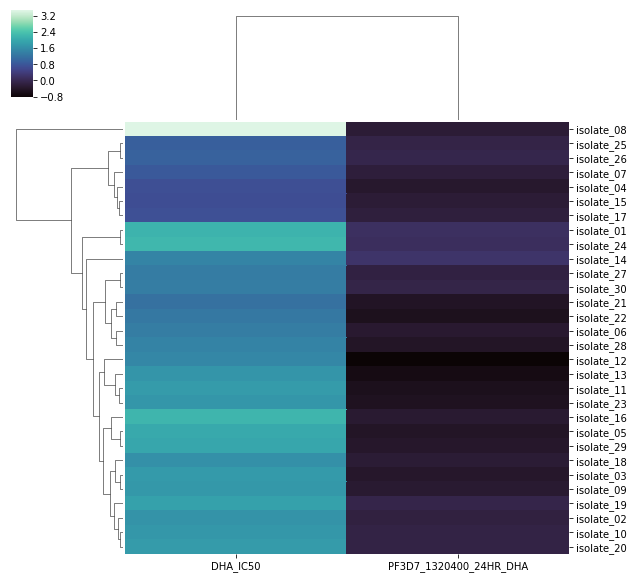

In [57]:
c = sn.clustermap(tmp.iloc[:,0:2], cmap="mako")

In [58]:
ic50 = tmp.pop("DHA_IC50")
reds_tuples = [(i,0,0) for i in np.linspace(0,1,30)]
reds_hex = [colors.to_hex(red) for red in reds_tuples]
greens_tuples = [(0,i,0) for i in np.linspace(0,1,30)]
greens_hex = [colors.to_hex(green) for green in greens_tuples]
blues_tuples = [(0,0,i) for i in np.linspace(0,1,30)]
blues_hex = [colors.to_hex(blue) for blue in blues_tuples]

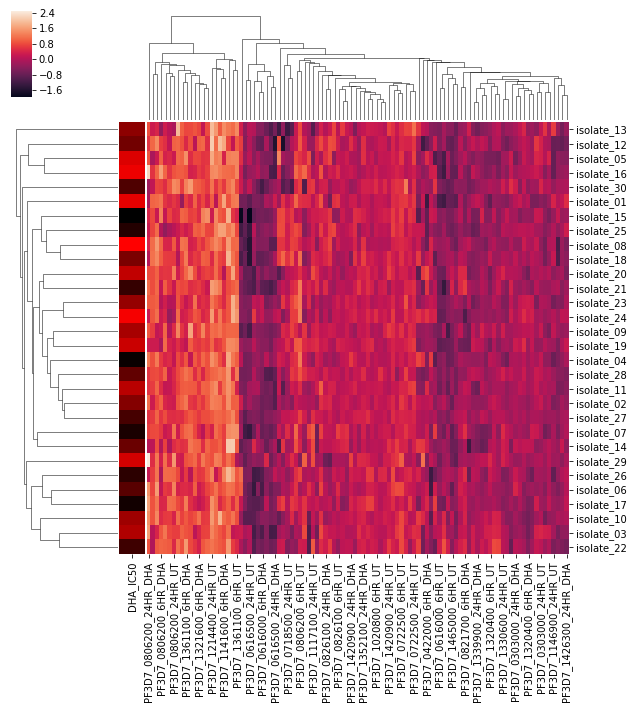

In [59]:
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp.iloc[:,0:100], row_colors=row_colors)

### 3.4 Make clustermaps by GO processes

In [60]:
GO.head(100)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


In [61]:
def getGenesFromGO(GO_process_ID):
    return list(GO[GO["GO Process ID"]==GO_process_ID]["Gene_ID"])[0]

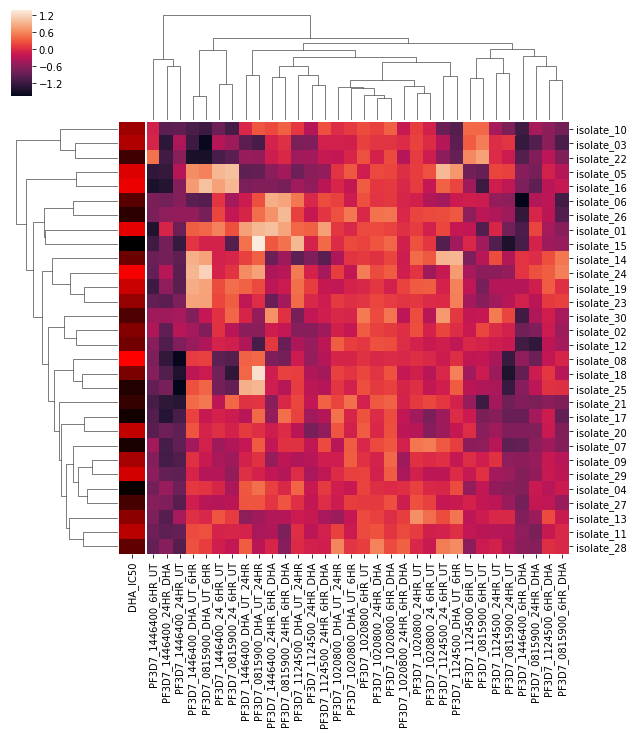

In [62]:
genes_selected = getGenesFromGO("GO:0006086")
cols = [gene_dict[gene] + gene_deltas_dict[gene] for gene in genes_selected]
final_cols = []
for col in cols:
    final_cols = final_cols + col
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp[final_cols], row_colors=row_colors)

In [63]:
ic50.sort_values()

isolate_15    0.6933
isolate_04    0.7100
isolate_17    0.7200
isolate_07    0.8567
isolate_25    0.9350
isolate_26    0.9667
isolate_21    1.1900
isolate_22    1.2830
isolate_27    1.3480
isolate_30    1.3630
isolate_06    1.3670
isolate_28    1.4530
isolate_14    1.4700
isolate_12    1.5170
isolate_18    1.6470
isolate_02    1.6970
isolate_13    1.7230
isolate_23    1.7440
isolate_10    1.7540
isolate_09    1.7650
isolate_03    1.7990
isolate_11    1.8200
isolate_20    1.8240
isolate_19    1.9060
isolate_29    1.9900
isolate_05    2.0250
isolate_01    2.1770
isolate_16    2.2100
isolate_24    2.2360
isolate_08    3.4600
Name: DHA_IC50, dtype: float64

## 4. Format the test data to look the same as flat_train

In [64]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


### 4.1 Filter the trest DataFrame 

Keep only the important genes found in steps 2.1 to 2.4.

In [30]:
genes_to_keep_test = set(list(test.columns)) & set(result)
genes_to_keep_test = list(genes_to_keep_test)
columns_to_keep_test = list(test.columns)[0:5] + \
[list(test.columns)[-1]] + genes_to_keep_test
columns_to_keep_test

['Sample_Names',
 'Isolate',
 'Timepoint',
 'Treatment',
 'BioRep',
 'DHA_IC50',
 'PF3D7_0826100',
 'PF3D7_1105500',
 'PF3D7_1426300',
 'PF3D7_1116600',
 'PF3D7_1136900',
 'PF3D7_1438100',
 'PF3D7_0918300',
 'PF3D7_1212700',
 'PF3D7_0529500',
 'PF3D7_1013900',
 'PF3D7_1420600',
 'PF3D7_0616000',
 'PF3D7_1216200',
 'PF3D7_1477800',
 'PF3D7_1213600',
 'PF3D7_0211600',
 'PF3D7_0529200',
 'PF3D7_0207500',
 'PF3D7_1472100',
 'PF3D7_1342100',
 'PF3D7_1426500',
 'PF3D7_0309600',
 'PF3D7_0718500',
 'PF3D7_1317900',
 'PF3D7_1445400',
 'PF3D7_1134800',
 'PF3D7_1226600',
 'PF3D7_1209300',
 'PF3D7_1207300',
 'PF3D7_1231100',
 'PF3D7_0525400',
 'PF3D7_0822700',
 'PF3D7_1324700',
 'PF3D7_1361400',
 'PF3D7_1431600',
 'PF3D7_0208200',
 'PF3D7_1450100',
 'PF3D7_0629500',
 'PF3D7_0504600',
 'PF3D7_1032500',
 'PF3D7_1345700',
 'PF3D7_0719500',
 'PF3D7_1338300',
 'PF3D7_1146000',
 'PF3D7_1123400',
 'PF3D7_0827100',
 'PF3D7_0527500',
 'PF3D7_0515300',
 'PF3D7_1364600',
 'PF3D7_1248900',
 'PF3D7_1241600',
 

In [31]:
filtered_test = test[columns_to_keep_test]
filtered_test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,DHA_IC50,PF3D7_0826100,PF3D7_1105500,PF3D7_1426300,PF3D7_1116600,...,PF3D7_1223400,PF3D7_1210100,PF3D7_0317800,PF3D7_0208600,PF3D7_1436300,PF3D7_1144900,PF3D7_1145100,PF3D7_0729300,PF3D7_1451100,PF3D7_1015600
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,NaN,0.193113,-0.535841,-0.225106,0.080940,...,-0.081177,0.187162,-0.168175,0.031832,0.610758,-0.197242,0.449681,0.869700,0.327015,0.704614
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,NaN,-0.240957,-0.140005,-0.079048,0.319397,...,-0.101023,0.269886,-0.569700,-0.234951,0.775762,-0.513899,0.169557,0.228752,-0.412193,-1.378348
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,NaN,-0.365166,-0.262089,0.157850,0.344927,...,-0.400099,0.223804,-0.168284,0.194289,0.337641,-0.202228,-0.074427,0.235050,-0.324622,-0.832101
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,NaN,0.051798,-0.540426,-0.110973,0.170581,...,0.073305,-0.013567,-0.623966,0.004015,0.597923,-0.794511,0.013809,0.589701,0.052662,-1.555237
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,NaN,0.349484,0.121680,-0.751043,-0.197615,...,0.403647,-0.014474,-0.582545,0.277542,0.176872,0.029167,0.541788,0.794854,-0.158121,-0.399996


### 4.2 Create new test DataFrame with engineered features

In [32]:
aggregated_means_test = filtered_test.groupby(["Isolate","Timepoint","Treatment"]).mean()
aggregated_means_test.head()

DHA_IC50  PF3D7_0826100  PF3D7_1105500  \
Isolate    Timepoint Treatment                                           
isolate_31 24HR      DHA             NaN      -0.023922      -0.337923   
                     UT              NaN      -0.156684      -0.401258   
           6HR       DHA             NaN       0.237541      -0.594097   
                     UT              NaN       0.399277      -0.397709   
isolate_32 24HR      DHA             NaN       0.236365      -0.428192   

                                PF3D7_1426300  PF3D7_1116600  PF3D7_1136900  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.152077       0.200168       0.245464   
                     UT              0.023439       0.257754       0.497216   
           6HR       DHA            -0.241998      -0.031387       0.534099   
                     UT             -0.475237       0.158868      -0.386342   
isolate_32 24HR      DHA            -0.309426       0.041769       0.421717   

                                PF3D7_1438100  PF3D7_0918300  PF3D7_1212700  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.449094      -1.466061       0.410241   
                     UT             -0.722383      -1.952748       0.155835   
           6HR       DHA            -0.697123      -0.897263       0.111343   
                     UT             -0.373986      -0.548558       0.308469   
isolate_32 24HR      DHA            -0.090261      -0.897938       0.436416   

                                PF3D7_0529500  ...  PF3D7_1223400  \
Isolate    Timepoint Treatment                 ...                  
isolate_31 24HR      DHA            -0.238069  ...      -0.091100   
                     UT             -0.778814  ...      -0.163397   
           6HR       DHA            -0.520825  ...       0.017336   
                     UT              0.152371  ...      -0.036853   
isolate_32 24HR      DHA             0.376781  ...       0.431863   

                                PF3D7_1210100  PF3D7_0317800  PF3D7_0208600  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA             0.228524      -0.368938      -0.101560   
                     UT              0.105119      -0.396125       0.099152   
           6HR       DHA             0.146386      -0.474625       0.268849   
                     UT             -0.322923      -0.175690       0.251104   
isolate_32 24HR      DHA            -0.002890      -0.256451       0.085707   

                                PF3D7_1436300  PF3D7_1144900  PF3D7_1145100  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA             0.693260      -0.355570       0.309619   
                     UT              0.467782      -0.498370      -0.030309   
           6HR       DHA            -0.042233      -0.130343       0.212785   
                     UT             -0.020528       0.030631       0.609394   
isolate_32 24HR      DHA             0.424198      -0.099198       0.569566   

                                PF3D7_0729300  PF3D7_1451100  PF3D7_1015600  
Isolate    Timepoint Treatment                                               
isolate_31 24HR      DHA             0.549226      -0.042589      -0.336867  
                     UT              0.412376      -0.135980      -1.193669  
           6HR       DHA             0.649595       0.026695      -0.409907  
                     UT              0.966001       0.375814       0.355056  
isolate_32 24HR      DHA             1.106082       0.611361      -0.221920  

[5 rows x 482 columns]

### 4.3 Flatten the aggregated_means_test data frame 
See point 3.2 for reference

In [33]:
isolates_list_test=aggregated_means_test.index.get_level_values(0)
isolates_list_test=list(dict.fromkeys(isolates_list_test))
isolates_list_test

['isolate_31',
 'isolate_32',
 'isolate_33',
 'isolate_34',
 'isolate_35',
 'isolate_36',
 'isolate_37',
 'isolate_38',
 'isolate_39',
 'isolate_40',
 'isolate_41',
 'isolate_42',
 'isolate_43',
 'isolate_44',
 'isolate_45',
 'isolate_46',
 'isolate_47',
 'isolate_48',
 'isolate_49',
 'isolate_50',
 'isolate_51',
 'isolate_52',
 'isolate_53',
 'isolate_54',
 'isolate_55']

## Save isolates_list_test to file

In [69]:
f = open("../data/isolates_test.txt", "w")
f.write("\n".join(isolates_list_test))
f.close()

In [34]:
flat_test=pd.DataFrame()
genes=[]
for gene in genes_list:
    temp_list=[]
    for isolate in isolates_list_test:
        temp_list.append(aggregated_means_test.loc[isolate][gene].tolist())
    flat_test=pd.concat([flat_test,pd.DataFrame(data=temp_list,columns=gene_dict[gene])],axis=1)

In [71]:
flat_test.head()

,PF3D7_1320400_24HR_DHA,PF3D7_1320400_24HR_UT,PF3D7_1320400_6HR_DHA,PF3D7_1320400_6HR_UT,PF3D7_1330600_24HR_DHA,PF3D7_1330600_24HR_UT,PF3D7_1330600_6HR_DHA,PF3D7_1330600_6HR_UT,PF3D7_0718500_24HR_DHA,PF3D7_0718500_24HR_UT,...,PF3D7_1220900_6HR_DHA,PF3D7_1220900_6HR_UT,PF3D7_0815700_24HR_DHA,PF3D7_0815700_24HR_UT,PF3D7_0815700_6HR_DHA,PF3D7_0815700_6HR_UT,PF3D7_0806400_24HR_DHA,PF3D7_0806400_24HR_UT,PF3D7_0806400_6HR_DHA,PF3D7_0806400_6HR_UT
0,-0.496220,-0.205819,-0.297698,-0.176457,-0.026993,-0.184111,-0.111504,0.021236,-0.363312,-0.667733,...,-0.203688,0.031952,-0.553047,0.151860,0.174624,-0.179570,-0.702025,-0.733466,-1.138247,-1.111293
1,-0.410900,-0.570203,-0.282694,-0.846817,0.037439,-0.222429,0.518632,-0.891269,-0.017395,0.397179,...,0.005316,-0.742451,-0.249281,-0.393709,0.066258,0.506818,-1.192762,-1.481943,-1.080646,-1.297367
2,0.126625,-0.134143,0.011314,-0.170277,-0.311933,0.192548,0.476600,-0.225284,-0.210986,-0.153042,...,0.004111,-0.295826,-0.100590,0.268522,0.232820,-0.082485,-0.796033,-0.847033,-0.619417,-0.578720
3,-0.001174,-0.040706,-0.373737,-0.645604,0.258427,0.103350,-0.426120,-0.104769,-0.153527,-0.015403,...,-0.304247,-0.435811,-0.005031,0.163800,-0.209338,-0.557308,-0.653177,-0.689459,-0.647641,-1.467380
4,-0.119890,-0.425346,-0.626991,-0.443222,-0.262380,-0.317042,0.612304,-0.253117,0.061437,-0.093336,...,-0.044460,-0.633153,-0.001135,0.118937,-0.004650,0.036490,-1.060953,-1.222695,-1.567437,-0.803661


### 4.4 Add the diferential between each timepoint-treatment combination
See point 3.3 for reference

In [72]:
for gene in gene_dict.keys():
    
    state1=gene_dict[gene][0] #gene_24HR_DHA
    state2=gene_dict[gene][1] #gene_24HR_UT
    state3=gene_dict[gene][2] #gene_6HR_DHA
    state4=gene_dict[gene][3] #gene_6HR_UT
    
    delta_A=flat_test[state1]-flat_test[state3]
    delta_B=flat_test[state2]-flat_test[state4]
    delta_C=flat_test[state3]-flat_test[state4]
    delta_D=flat_test[state1]-flat_test[state2]
    
    delta_A_label=gene_deltas_dict[gene][0] #gene_24HR_6HR_DHA
    delta_B_label=gene_deltas_dict[gene][1] #gene_24HR_6HR_UT
    delta_C_label=gene_deltas_dict[gene][2] #gene_DHA_UT_6HR
    delta_D_label=gene_deltas_dict[gene][3] #gene_DHA_UT_24HR
    
    temp_df=pd.DataFrame({delta_A_label:delta_A,delta_B_label:delta_B,delta_C_label:delta_C,delta_D_label:delta_D})
    flat_test=pd.concat([flat_test,temp_df],axis=1)

In [73]:
flat_test.head()
flat_test.index=isolates_list_test
flat_test.head()

,PF3D7_1320400_24HR_DHA,PF3D7_1320400_24HR_UT,PF3D7_1320400_6HR_DHA,PF3D7_1320400_6HR_UT,PF3D7_1330600_24HR_DHA,PF3D7_1330600_24HR_UT,PF3D7_1330600_6HR_DHA,PF3D7_1330600_6HR_UT,PF3D7_0718500_24HR_DHA,PF3D7_0718500_24HR_UT,...,PF3D7_1220900_DHA_UT_6HR,PF3D7_1220900_DHA_UT_24HR,PF3D7_0815700_24HR_6HR_DHA,PF3D7_0815700_24_6HR_UT,PF3D7_0815700_DHA_UT_6HR,PF3D7_0815700_DHA_UT_24HR,PF3D7_0806400_24HR_6HR_DHA,PF3D7_0806400_24_6HR_UT,PF3D7_0806400_DHA_UT_6HR,PF3D7_0806400_DHA_UT_24HR
isolate_31,-0.496220,-0.205819,-0.297698,-0.176457,-0.026993,-0.184111,-0.111504,0.021236,-0.363312,-0.667733,...,-0.235640,0.297858,-0.727671,0.331430,0.354194,-0.704907,0.436223,0.377827,-0.026954,0.031441
isolate_32,-0.410900,-0.570203,-0.282694,-0.846817,0.037439,-0.222429,0.518632,-0.891269,-0.017395,0.397179,...,0.747767,-0.005336,-0.315538,-0.900526,-0.440560,0.144428,-0.112116,-0.184576,0.216721,0.289182
isolate_33,0.126625,-0.134143,0.011314,-0.170277,-0.311933,0.192548,0.476600,-0.225284,-0.210986,-0.153042,...,0.299938,0.089551,-0.333410,0.351006,0.315305,-0.369111,-0.176616,-0.268314,-0.040697,0.051001
isolate_34,-0.001174,-0.040706,-0.373737,-0.645604,0.258427,0.103350,-0.426120,-0.104769,-0.153527,-0.015403,...,0.131564,0.125892,0.204306,0.721108,0.347970,-0.168831,-0.005535,0.777921,0.819739,0.036283
isolate_35,-0.119890,-0.425346,-0.626991,-0.443222,-0.262380,-0.317042,0.612304,-0.253117,0.061437,-0.093336,...,0.588694,-0.289170,0.003515,0.082447,-0.041141,-0.120072,0.506484,-0.419034,-0.763776,0.161742


In [74]:
flat_test.to_csv('../data/flat_test.csv',sep=',')

### 4.5 Perform PCA on flat_train and flat_test

### 4.5.1 Normalize flat_train and flat_test

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [57]:
X=flat_train.values
X_test=flat_test.values

In [58]:
X_norm=sc.fit_transform(X)
X_norm

array([[-0.64844555,  0.48090184, -1.11617803, ...,  0.09988005,
         0.46715759,  1.10961166],
       [ 0.80503683, -0.7783882 , -1.17669832, ...,  0.09333194,
         0.09762031, -0.81544227],
       [ 0.65393451, -0.5066075 ,  0.44834352, ..., -0.42807473,
         1.12539705,  0.99244806],
       ...,
       [ 0.8729786 ,  0.2719521 , -0.74089918, ...,  0.45262484,
        -0.82513246, -0.25943684],
       [-3.15168305, -0.60194101,  0.02857599, ...,  0.83735299,
        -1.10127604, -1.25299435],
       [ 0.77342739, -1.34386622,  0.60716779, ..., -1.44029519,
        -0.97857551,  0.73358858]])

In [59]:
X_norm_test=sc.fit_transform(X_test)
X_norm_test

array([[-0.92712415, -1.12347244,  0.00700714, ..., -1.07363526,
        -0.1621204 ,  1.21007498],
       [ 0.20574676,  1.00738119,  0.38757609, ...,  0.86539552,
         1.55441218, -0.42990154],
       [-0.27580068, -0.6371163 , -0.20096155, ...,  0.2984172 ,
         0.93399277, -0.88097307],
       ...,
       [ 0.05898744, -1.64457222, -0.57136562, ..., -0.35607012,
         0.003587  , -0.11564876],
       [-0.52343322,  0.18935746, -1.15233422, ..., -1.8338147 ,
        -0.91926054,  0.85874714],
       [ 0.67622823,  0.03994551,  0.28725669, ..., -1.17346831,
         0.28317478,  1.00635307]])

### 4.5.2 Perform PCA on flat_test and flat_train

In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=30, svd_solver='auto')

In [42]:
X_transformed=pca.fit_transform(X_norm)

In [43]:
pca.components_

array([[-3.72380072e-03, -3.08164464e-02,  2.50959648e-02, ...,
        -2.11233850e-02,  2.40217515e-02,  1.68076761e-02],
       [ 1.73084366e-02, -4.00728630e-02, -4.74451027e-03, ...,
        -4.34476631e-02,  9.89781235e-03, -9.39930492e-03],
       [-2.99761820e-02, -1.52048123e-02,  2.46639597e-02, ...,
        -3.07522325e-02,  2.74714038e-02,  3.21489996e-02],
       ...,
       [ 8.59275859e-03, -3.08331246e-03, -6.02287783e-03, ...,
         2.93218470e-02,  1.55216390e-02, -2.53210412e-02],
       [-1.89642918e-02,  4.58156124e-02, -1.30034883e-04, ...,
        -3.43736504e-04, -2.11369264e-02,  3.27834415e-02],
       [-2.40171750e-01,  7.18328911e-02,  1.09432878e-01, ...,
         4.01960884e-03, -1.82971235e-02, -8.44529890e-03]])

In [44]:
X_transformed.shape

(30, 30)

In [45]:
X_transformed

array([[-1.89279016e+01, -1.40938802e+01,  3.05162316e+01,
         7.90091646e-01, -1.63437113e+00,  6.61358779e+00,
        -1.01605638e+01, -1.34532074e+01,  8.82173507e+00,
        -6.86524896e+00, -3.96836859e+00, -2.53424966e+00,
         6.24011687e+00, -1.03577864e+01,  9.74508737e+00,
         1.30774330e+01,  1.02116918e+01, -3.30027018e+00,
        -3.52117523e-01,  3.34416250e+00,  1.45358287e+00,
         2.76097756e+00,  4.76650515e-01,  1.70873328e+00,
        -1.70579320e+00,  1.94501284e+00, -2.17382882e+00,
        -1.12346813e+00, -2.23352316e-01,  7.23603256e-15],
       [ 9.01386640e+00,  1.17250367e+01, -1.17551259e+01,
        -8.50108810e-01, -2.12568232e+00,  5.26392595e+00,
        -6.36303120e+00, -5.78078768e+00, -2.27959123e+00,
         3.05170927e+00, -4.62648593e+00,  3.57089815e+00,
         1.03855159e+00, -3.42167019e+00,  5.07730831e+00,
         5.97352661e-01, -1.31820350e+00,  1.69858397e+00,
         7.28672156e+00, -5.80289859e-01,  1.44371705e+

In [46]:
feature_labels=['component'+ str(i) for i in range(30)]
train_PCA_30=pd.DataFrame(X_transformed,columns=feature_labels)
train_PCA_30.index=isolates_list
train_PCA_30

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,...,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29
isolate_01,-18.927902,-14.093880,30.516232,0.790092,-1.634371,6.613588,-10.160564,-13.453207,8.821735,-6.865249,...,1.453583,2.760978,0.476651,1.708733,-1.705793,1.945013,-2.173829,-1.123468,-0.223352,7.236033e-15
isolate_02,9.013866,11.725037,-11.755126,-0.850109,-2.125682,5.263926,-6.363031,-5.780788,-2.279591,3.051709,...,1.443717,1.000712,-4.208801,1.381617,2.444038,1.322527,-5.254908,13.204205,-3.959930,7.236033e-15
isolate_03,43.302210,-0.374044,-5.303728,3.406207,0.423054,9.556135,4.676917,-2.545014,-1.662374,-10.846538,...,-9.091671,-2.052947,-1.424197,0.915692,-4.358523,-0.460303,2.115309,-2.611570,1.020810,7.236033e-15
isolate_04,-12.374512,-8.481753,-2.157276,1.197213,-15.079182,-0.782412,2.856653,-4.644257,-18.198381,11.601930,...,6.364398,-1.184465,-4.741651,-4.988945,8.613020,2.353099,-5.656185,-5.486998,0.375328,7.236033e-15
isolate_05,-0.383829,25.270493,3.419017,16.082196,20.287022,-0.144362,-6.975499,-0.125701,-16.156556,6.791839,...,2.507034,-1.633546,-8.042641,3.664518,-0.129420,-0.266375,2.824501,-2.151003,1.299527,7.236033e-15
isolate_06,14.810875,-1.055014,11.751576,-6.485905,5.410833,-12.996309,-9.309351,-15.534644,4.969130,3.472954,...,-2.280702,-2.961419,-0.745705,5.898008,1.149120,4.739837,-1.747104,-3.623603,1.528931,7.236033e-15
isolate_07,-12.043961,11.001254,-6.133075,-3.923941,15.449406,-13.708100,-0.521817,-18.925620,18.727460,-10.237999,...,5.186545,-1.730375,-7.002742,-3.359378,1.317285,-1.281933,0.380152,-0.759013,-0.806870,7.236033e-15
isolate_08,-11.406621,-2.643556,-20.605548,10.338156,2.925320,-3.338105,-2.105926,-10.380531,-9.454935,-6.732372,...,5.585985,1.225102,6.937894,-0.836711,-9.126887,-7.256405,-6.282878,-0.890064,1.532223,7.236033e-15
isolate_09,-9.722502,-2.351540,5.457556,7.693379,-3.956485,5.186036,14.634184,9.688730,25.397621,-2.925706,...,5.745104,4.572502,-1.907164,1.479120,-2.282203,-0.268449,0.522562,0.592076,-1.324234,7.236033e-15
isolate_10,16.794797,-14.462427,3.957126,-11.761599,-14.881498,-4.732116,2.668225,-4.195639,13.967207,12.961951,...,-1.265691,-2.686946,-6.001390,2.300187,-0.757596,-3.843945,4.236418,-0.012989,-0.316665,7.236033e-15


In [47]:
train_PCA_30.to_csv('../data/train_PCA_30.csv', sep=',')

### 4.5.3 PCA for test data with 25 rows (isolates)

In [48]:
pca=PCA(n_components=25, svd_solver='auto')

In [49]:
X_transformed_test=pca.fit_transform(X_norm_test)

In [50]:
pca.components_

array([[-1.68854513e-02, -3.20018226e-02, -2.60536793e-02, ...,
        -7.38664552e-03, -1.98457146e-02,  2.86825812e-02],
       [ 7.58634018e-03, -2.89195280e-02,  4.22746445e-03, ...,
        -3.89962516e-02,  2.03643141e-02,  1.50698484e-02],
       [-2.20811716e-02, -4.36124020e-03,  4.07803848e-02, ...,
        -3.45498794e-02,  1.43369655e-02, -8.03853991e-03],
       ...,
       [-2.59601313e-02,  9.48495020e-03, -6.00602959e-03, ...,
        -1.27124144e-03,  4.36686207e-04, -6.00019424e-03],
       [ 2.61394946e-02, -1.19958758e-02,  1.08248558e-02, ...,
        -1.26726893e-02,  1.74506813e-02, -6.67854256e-03],
       [-3.24046323e-01,  1.85446279e-01, -2.34357291e-01, ...,
         1.51578603e-02, -1.21051066e-03, -6.44519255e-07]])

In [51]:
X_transformed_test.shape

(25, 25)

In [52]:
X_transformed_test

array([[ 1.48583763e+01,  9.18380950e+00,  4.87157299e-01,
         1.68908506e+01, -1.90698173e-01,  6.51132633e+00,
         6.98949797e+00, -9.23488975e+00,  6.37843688e+00,
        -3.49971909e+00,  1.30582496e+01, -9.41916937e+00,
         1.30530798e+01,  2.07972725e+00, -6.13651605e+00,
         1.24321571e+01,  5.83422649e+00, -2.81762039e-01,
         3.71250183e+00, -4.11121699e+00, -7.04966641e+00,
        -2.54211378e+00, -1.55690993e+00, -2.27458707e+00,
         2.95265951e-15],
       [-1.87864926e+01, -2.56905042e+01, -2.94713255e+00,
         1.75197622e+01, -1.06383707e+01, -1.43701641e+01,
         4.85078871e-01, -1.07552575e+01,  3.03570395e+00,
        -5.26331242e+00, -2.96425677e+00,  4.72599054e+00,
        -1.18201956e+01, -1.29193142e-01, -3.77360072e+00,
        -3.25441177e+00,  7.95190917e+00,  4.06905393e+00,
         1.31070686e+01,  1.02020476e+00, -1.92870300e+00,
        -3.72315707e+00,  1.18682024e+00, -3.55734964e-01,
         2.95265951e-15],
    

In [53]:
feature_labels=['component'+ str(i) for i in range(25)]
test_PCA_30=pd.DataFrame(X_transformed_test,columns=feature_labels)
test_PCA_30.index=isolates_list_test
test_PCA_30

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,...,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24
isolate_31,14.858376,9.183810,0.487157,16.890851,-0.190698,6.511326,6.989498,-9.234890,6.378437,-3.499719,...,12.432157,5.834226,-0.281762,3.712502,-4.111217,-7.049666,-2.542114,-1.556910,-2.274587,2.952660e-15
isolate_32,-18.786493,-25.690504,-2.947133,17.519762,-10.638371,-14.370164,0.485079,-10.755257,3.035704,-5.263312,...,-3.254412,7.951909,4.069054,13.107069,1.020205,-1.928703,-3.723157,1.186820,-0.355735,2.952660e-15
isolate_33,10.002692,8.632096,-0.819955,-11.831474,-17.906234,-14.580087,-8.222696,-9.936015,11.624271,4.756644,...,1.080656,-2.927395,-0.050150,0.223120,6.319056,2.748938,-5.261129,-3.522526,11.282595,2.952660e-15
isolate_34,24.280906,-4.545530,2.249229,5.157276,1.132503,6.479797,12.847026,8.405450,7.837770,-0.593943,...,-2.046038,-6.729041,8.257521,3.562531,-5.952803,12.764430,-2.135159,-0.873014,0.707834,2.952660e-15
isolate_35,-27.278064,-7.133604,23.484731,0.755234,-17.414288,-8.104421,-11.204361,1.241989,1.962065,-1.941922,...,2.830626,-0.463417,-8.616390,-4.046699,-7.952688,3.233129,9.855332,-6.863517,-1.986905,2.952660e-15
isolate_36,0.999695,13.729141,5.865185,1.824380,1.676381,12.091106,-15.683232,20.758383,-7.839416,11.557172,...,-8.943829,2.729656,-6.528396,9.242254,-2.299852,-3.592506,-4.495893,0.909948,4.412572,2.952660e-15
isolate_37,-28.902196,-24.908678,-20.811674,-1.183714,21.104697,-7.669652,-4.148906,5.595740,8.156098,1.016325,...,-3.091800,-9.779302,-0.172242,-2.474026,-8.117292,-3.024838,-4.443970,1.385124,-0.673558,2.952660e-15
isolate_38,-26.810345,16.231863,-4.033658,0.258422,11.383065,-11.431092,6.904637,21.602019,2.858086,-4.144952,...,7.845038,8.724885,6.536403,-5.074899,0.377926,-2.495304,0.940761,-2.442142,7.334428,2.952660e-15
isolate_39,-22.513405,3.985963,9.334765,19.461049,-8.626008,-0.579406,22.140229,-6.803821,-10.705106,-0.822536,...,-8.576171,-7.595300,-0.787776,-6.314145,4.996387,0.250228,1.869365,6.386958,5.034242,2.952660e-15
isolate_40,15.918981,8.268756,-1.013143,1.257505,-11.890994,2.051799,15.078460,17.300871,16.705320,-1.765404,...,-0.154237,-8.957498,0.287164,2.853808,2.997071,-6.449564,5.245703,-2.688129,-4.322050,2.952660e-15


In [ ]:
test_PCA_30.to_csv('../data/test_PCA_30.csv', sep=',')

### 4.5.2 Perform KernelPCA on flat_test and flat_train

In [62]:
from sklearn.decomposition import KernelPCA
pca=KernelPCA(n_components=30, kernel='poly')

In [63]:
X_transformed=pca.fit_transform(X_norm)

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)


In [65]:
X_transformed.shape

(30, 30)

In [66]:
X_transformed

array([[ 8.55441849e-01, -4.72970044e-01,  1.90132085e+00,
         5.40271531e-01, -1.64261727e-01,  1.37864940e+00,
        -8.74220907e-02,  1.08016820e+00,  1.40604565e+00,
         5.01911988e-01,  2.65559768e-01, -3.42814443e-01,
         3.40802433e-01,  2.93344076e-01,  3.20504408e-01,
         1.72701559e-01,  3.61433496e-01,  1.36605380e-01,
         1.58549790e-01, -1.25647223e-01,  1.46947265e-01,
         4.72458764e-03,  6.21959664e-02, -3.84862260e-02,
        -2.08171184e-02,  1.59656290e-02, -4.08857150e-02,
         6.13758818e-03,  1.46358716e-02,             nan],
       [-2.94936508e-01, -9.48889394e-02, -4.15360169e-01,
        -1.38694682e-02,  7.43434135e-02, -2.45563766e-02,
        -1.49523352e-01,  1.81640082e-02,  7.47192379e-03,
         1.91945131e-01,  1.67567917e-01, -7.55395395e-02,
         7.88133305e-02, -6.73260485e-02, -2.66740098e-02,
         3.48465984e-02,  8.16806975e-02,  4.76005966e-02,
        -4.00913254e-03,  1.37267675e-01,  1.16966085e-

In [78]:
feature_labels=['component'+ str(i) for i in range(30)]
train_KPCA_30=pd.DataFrame(X_transformed,columns=feature_labels)
train_KPCA_30.index=isolates_list
train_KPCA_30.drop('component29',axis=1,inplace=True)

In [79]:
train_KPCA_30.to_csv('../data/train_KPCA_30.csv', sep=',')

### 4.5.3 PCA for test data with 25 rows (isolates)

In [69]:
pca=KernelPCA(n_components=25, kernel='poly')

In [70]:
X_transformed_test=pca.fit_transform(X_norm_test)

In [71]:
X_transformed_test.shape

(25, 25)

In [72]:
X_transformed_test

array([[-3.77139609e-01,  3.88732368e-01, -8.01754576e-02,
        -1.32567792e-01, -2.27843760e-01,  8.63563691e-01,
        -1.50547079e-01,  2.62492805e-01, -1.75384136e-01,
         2.96206775e-02,  4.36325108e-01,  2.81211061e-01,
        -2.94650475e-01,  3.34195724e-02,  4.76327936e-01,
         6.08272458e-01, -2.78932674e-01, -2.38838139e-01,
         1.26669998e+00,  6.79459537e-01,  3.85930310e-02,
         4.61771282e-01, -5.56872812e-01,  1.50702353e-01,
        -1.24807408e-08],
       [ 9.07860932e-01, -8.30087809e-01,  1.57386771e-01,
         9.40821358e-01, -1.61697486e+00, -1.39608973e-01,
        -6.38053433e-02,  8.78272100e-01,  3.49321074e-01,
        -1.44197513e+00, -5.14135474e-01, -6.13668630e-01,
        -1.45787921e-01, -3.63575433e-01, -1.23521496e-01,
        -7.18530603e-02,  4.97629112e-02, -1.45118572e-01,
         1.25239052e-01,  3.15655184e-02,  8.09100236e-02,
         3.13043187e-02,  3.73039263e-03, -3.58950323e-02,
        -1.24807408e-08],
    

In [76]:
feature_labels=['component'+ str(i) for i in range(25)]
test_KPCA_30=pd.DataFrame(X_transformed_test,columns=feature_labels)
test_KPCA_30.index=isolates_list_test
test_KPCA_30.drop('component24',axis=1,inplace=True)

In [77]:
test_KPCA_30.to_csv('../data/test_KPCA_30.csv', sep=',')

## Save the genes_dict to a file

In [75]:
genes_dict={}
for gene in gene_dict:
    genes_dict[gene]=gene_dict[gene]+gene_deltas_dict[gene]
genes_dict

{'PF3D7_1320400': ['PF3D7_1320400_24HR_DHA',
  'PF3D7_1320400_24HR_UT',
  'PF3D7_1320400_6HR_DHA',
  'PF3D7_1320400_6HR_UT',
  'PF3D7_1320400_24HR_6HR_DHA',
  'PF3D7_1320400_24_6HR_UT',
  'PF3D7_1320400_DHA_UT_6HR',
  'PF3D7_1320400_DHA_UT_24HR'],
 'PF3D7_1330600': ['PF3D7_1330600_24HR_DHA',
  'PF3D7_1330600_24HR_UT',
  'PF3D7_1330600_6HR_DHA',
  'PF3D7_1330600_6HR_UT',
  'PF3D7_1330600_24HR_6HR_DHA',
  'PF3D7_1330600_24_6HR_UT',
  'PF3D7_1330600_DHA_UT_6HR',
  'PF3D7_1330600_DHA_UT_24HR'],
 'PF3D7_0718500': ['PF3D7_0718500_24HR_DHA',
  'PF3D7_0718500_24HR_UT',
  'PF3D7_0718500_6HR_DHA',
  'PF3D7_0718500_6HR_UT',
  'PF3D7_0718500_24HR_6HR_DHA',
  'PF3D7_0718500_24_6HR_UT',
  'PF3D7_0718500_DHA_UT_6HR',
  'PF3D7_0718500_DHA_UT_24HR'],
 'PF3D7_1214400': ['PF3D7_1214400_24HR_DHA',
  'PF3D7_1214400_24HR_UT',
  'PF3D7_1214400_6HR_DHA',
  'PF3D7_1214400_6HR_UT',
  'PF3D7_1214400_24HR_6HR_DHA',
  'PF3D7_1214400_24_6HR_UT',
  'PF3D7_1214400_DHA_UT_6HR',
  'PF3D7_1214400_DHA_UT_24HR'],
 'PF3D7_

In [76]:
genes_df=pd.DataFrame()
for gene in genes_dict:
    temp_df=pd.DataFrame({gene: genes_dict[gene]})
    genes_df=pd.concat([genes_df,temp_df],axis=1)

In [77]:
genes_df

,PF3D7_1320400,PF3D7_1330600,PF3D7_0718500,PF3D7_1214400,PF3D7_0419900,PF3D7_1352100,PF3D7_0722500,PF3D7_1020800,PF3D7_1141600,PF3D7_0303000,...,PF3D7_0207500,PF3D7_0910600,PF3D7_1313000,PF3D7_1238800,PF3D7_1246200,PF3D7_0820700,PF3D7_1015900,PF3D7_1220900,PF3D7_0815700,PF3D7_0806400
0,PF3D7_1320400_24HR_DHA,PF3D7_1330600_24HR_DHA,PF3D7_0718500_24HR_DHA,PF3D7_1214400_24HR_DHA,PF3D7_0419900_24HR_DHA,PF3D7_1352100_24HR_DHA,PF3D7_0722500_24HR_DHA,PF3D7_1020800_24HR_DHA,PF3D7_1141600_24HR_DHA,PF3D7_0303000_24HR_DHA,...,PF3D7_0207500_24HR_DHA,PF3D7_0910600_24HR_DHA,PF3D7_1313000_24HR_DHA,PF3D7_1238800_24HR_DHA,PF3D7_1246200_24HR_DHA,PF3D7_0820700_24HR_DHA,PF3D7_1015900_24HR_DHA,PF3D7_1220900_24HR_DHA,PF3D7_0815700_24HR_DHA,PF3D7_0806400_24HR_DHA
1,PF3D7_1320400_24HR_UT,PF3D7_1330600_24HR_UT,PF3D7_0718500_24HR_UT,PF3D7_1214400_24HR_UT,PF3D7_0419900_24HR_UT,PF3D7_1352100_24HR_UT,PF3D7_0722500_24HR_UT,PF3D7_1020800_24HR_UT,PF3D7_1141600_24HR_UT,PF3D7_0303000_24HR_UT,...,PF3D7_0207500_24HR_UT,PF3D7_0910600_24HR_UT,PF3D7_1313000_24HR_UT,PF3D7_1238800_24HR_UT,PF3D7_1246200_24HR_UT,PF3D7_0820700_24HR_UT,PF3D7_1015900_24HR_UT,PF3D7_1220900_24HR_UT,PF3D7_0815700_24HR_UT,PF3D7_0806400_24HR_UT
2,PF3D7_1320400_6HR_DHA,PF3D7_1330600_6HR_DHA,PF3D7_0718500_6HR_DHA,PF3D7_1214400_6HR_DHA,PF3D7_0419900_6HR_DHA,PF3D7_1352100_6HR_DHA,PF3D7_0722500_6HR_DHA,PF3D7_1020800_6HR_DHA,PF3D7_1141600_6HR_DHA,PF3D7_0303000_6HR_DHA,...,PF3D7_0207500_6HR_DHA,PF3D7_0910600_6HR_DHA,PF3D7_1313000_6HR_DHA,PF3D7_1238800_6HR_DHA,PF3D7_1246200_6HR_DHA,PF3D7_0820700_6HR_DHA,PF3D7_1015900_6HR_DHA,PF3D7_1220900_6HR_DHA,PF3D7_0815700_6HR_DHA,PF3D7_0806400_6HR_DHA
3,PF3D7_1320400_6HR_UT,PF3D7_1330600_6HR_UT,PF3D7_0718500_6HR_UT,PF3D7_1214400_6HR_UT,PF3D7_0419900_6HR_UT,PF3D7_1352100_6HR_UT,PF3D7_0722500_6HR_UT,PF3D7_1020800_6HR_UT,PF3D7_1141600_6HR_UT,PF3D7_0303000_6HR_UT,...,PF3D7_0207500_6HR_UT,PF3D7_0910600_6HR_UT,PF3D7_1313000_6HR_UT,PF3D7_1238800_6HR_UT,PF3D7_1246200_6HR_UT,PF3D7_0820700_6HR_UT,PF3D7_1015900_6HR_UT,PF3D7_1220900_6HR_UT,PF3D7_0815700_6HR_UT,PF3D7_0806400_6HR_UT
4,PF3D7_1320400_24HR_6HR_DHA,PF3D7_1330600_24HR_6HR_DHA,PF3D7_0718500_24HR_6HR_DHA,PF3D7_1214400_24HR_6HR_DHA,PF3D7_0419900_24HR_6HR_DHA,PF3D7_1352100_24HR_6HR_DHA,PF3D7_0722500_24HR_6HR_DHA,PF3D7_1020800_24HR_6HR_DHA,PF3D7_1141600_24HR_6HR_DHA,PF3D7_0303000_24HR_6HR_DHA,...,PF3D7_0207500_24HR_6HR_DHA,PF3D7_0910600_24HR_6HR_DHA,PF3D7_1313000_24HR_6HR_DHA,PF3D7_1238800_24HR_6HR_DHA,PF3D7_1246200_24HR_6HR_DHA,PF3D7_0820700_24HR_6HR_DHA,PF3D7_1015900_24HR_6HR_DHA,PF3D7_1220900_24HR_6HR_DHA,PF3D7_0815700_24HR_6HR_DHA,PF3D7_0806400_24HR_6HR_DHA
5,PF3D7_1320400_24_6HR_UT,PF3D7_1330600_24_6HR_UT,PF3D7_0718500_24_6HR_UT,PF3D7_1214400_24_6HR_UT,PF3D7_0419900_24_6HR_UT,PF3D7_1352100_24_6HR_UT,PF3D7_0722500_24_6HR_UT,PF3D7_1020800_24_6HR_UT,PF3D7_1141600_24_6HR_UT,PF3D7_0303000_24_6HR_UT,...,PF3D7_0207500_24_6HR_UT,PF3D7_0910600_24_6HR_UT,PF3D7_1313000_24_6HR_UT,PF3D7_1238800_24_6HR_UT,PF3D7_1246200_24_6HR_UT,PF3D7_0820700_24_6HR_UT,PF3D7_1015900_24_6HR_UT,PF3D7_1220900_24_6HR_UT,PF3D7_0815700_24_6HR_UT,PF3D7_0806400_24_6HR_UT
6,PF3D7_1320400_DHA_UT_6HR,PF3D7_1330600_DHA_UT_6HR,PF3D7_0718500_DHA_UT_6HR,PF3D7_1214400_DHA_UT_6HR,PF3D7_0419900_DHA_UT_6HR,PF3D7_1352100_DHA_UT_6HR,PF3D7_0722500_DHA_UT_6HR,PF3D7_1020800_DHA_UT_6HR,PF3D7_1141600_DHA_UT_6HR,PF3D7_0303000_DHA_UT_6HR,...,PF3D7_0207500_DHA_UT_6HR,PF3D7_0910600_DHA_UT_6HR,PF3D7_1313000_DHA_UT_6HR,PF3D7_1238800_DHA_UT_6HR,PF3D7_1246200_DHA_UT_6HR,PF3D7_0820700_DHA_UT_6HR,PF3D7_1015900_DHA_UT_6HR,PF3D7_1220900_DHA_UT_6HR,PF3D7_0815700_DHA_UT_6HR,PF3D7_0806400_DHA_UT_6HR
7,PF3D7_1320400_DHA_UT_24HR,PF3D7_1330600_DHA_UT_24HR,PF3D7_0718500_DHA_UT_24HR,PF3D7_1214400_DHA_UT_24HR,PF3D7_0419900_DHA_UT_24HR,PF3D7_1352100_DHA_UT_24HR,PF3D7_0722500_DHA_UT_24HR,PF3D7_1020800_DHA_UT_24HR,PF3D7_1141600_DHA_UT_24HR,PF3D7_0303000_DHA_UT_24HR,...,PF3D7_0207500_DHA_UT_24HR,PF3D7_0910600_DHA_UT_24HR,PF3D7_1313000_DHA_UT_24HR,PF3D7_1238800_DHA_UT_24HR,PF3D7_1246200_DHA_UT_24

In [78]:
genes_df.to_csv('../data/genes_column_labels.csv')

# The following section will format the train data from the begining ignoring steps 2 - 4

## 5. Flatten original train data and test data

### 5.1 Flatten the original train data

That is perform flattening to the original dataframe **train**, following the step 3.

In [79]:
train.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [80]:
aggregated_means_Alltrain = train.groupby(["Isolate","Timepoint","Treatment"]).mean()

In [82]:
aggregated_means_Alltrain.head(10)

MAL1.465720.465873.bc..rv..  \
Isolate    Timepoint Treatment                                
isolate_01 24HR      DHA                          -0.431871   
                     UT                            0.082329   
           6HR       DHA                           0.568441   
                     UT                            1.154536   
isolate_02 24HR      DHA                           0.146128   
                     UT                           -0.276992   
           6HR       DHA                           0.130362   
                     UT                            0.135945   
isolate_03 24HR      DHA                          -0.103937   
                     UT                            0.062742   

                                MAL1.48287.48430....kr...can  \
Isolate    Timepoint Treatment                                 
isolate_01 24HR      DHA                           -1.464025   
                     UT                            -1.377065   
           6HR       DHA                           -1.603999   
                     UT                            -1.583729   
isolate_02 24HR      DHA                           -1.584068   
                     UT                            -1.575169   
           6HR       DHA                           -1.943027   
                     UT                            -1.648737   
isolate_03 24HR      DHA                           -1.341983   
                     UT                            -1.088531   

                                MAL1.562126.562246.bc..r...  \
Isolate    Timepoint Treatment                                
isolate_01 24HR      DHA                          -1.051048   
                     UT                           -1.417383   
           6HR       DHA                          -0.991081   
                     UT                           -1.629632   
isolate_02 24HR      DHA                          -1.300672   
                     UT                           -1.016901   
           6HR       DHA                          -1.126395   
                     UT                           -0.838114   
isolate_03 24HR      DHA                          -0.511717   
                     UT                           -1.131026   

                                MAL1.59416.59687....kr...can  \
Isolate    Timepoint Treatment                                 
isolate_01 24HR      DHA                           -0.815274   
                     UT                            -0.683222   
           6HR       DHA                           -1.150271   
                     UT                            -1.432966   
isolate_02 24HR      DHA                           -1.163429   
                     UT                            -0.926967   
           6HR       DHA                           -1.027129   
                     UT                            -0.940218   
isolate_03 24HR      DHA                           -1.329885   
                     UT                            -0.977955   

                                MAL1.616633.616682.......y.  \
Isolate    Timepoint Treatment                                
isolate_01 24HR      DHA                           0.480802   
                     UT                           -1.594652   
           6HR       DHA                          -0.873965   
                     UT                           -0.856157   
isolate_02 24HR      DHA                           0.207090   
                     UT                            0.829147   
           6HR       DHA                          -0.949520   
                     UT                            0.572345   
isolate_03 24HR      DHA                          -0.070253   
                     UT                           -0.464434   

                                MAL10.1139073.1139243....kr  \
Isolate    Timepoint Treatment                                
isolate_01 24HR      DHA                          -0.038627   
                     UT           

In [83]:
aggregated_means_Alltrain.index[5]

('isolate_02', '24HR', 'UT')

In [87]:
All_genes_list=list(aggregated_means_Alltrain.columns)[:-1]

In [93]:
All_genes_list

['MAL1.465720.465873.bc..rv..',
 'MAL1.48287.48430....kr...can',
 'MAL1.562126.562246.bc..r...',
 'MAL1.59416.59687....kr...can',
 'MAL1.616633.616682.......y.',
 'MAL10.1139073.1139243....kr',
 'MAL10.258733.258825.b...r..',
 'MAL10.271753.271892.bcgkrvy',
 'MAL10.273174.273239.....r..',
 'MAL10.416036.416142...g....',
 'MAL10.947605.947888.b..kr..',
 'MAL11.1116008.1116068.....r',
 'MAL11.1839112.1839193....k.',
 'MAL11.228710.228826.b.gk...',
 'MAL11.390127.390200..cg...y',
 'MAL11.42992.43250.bc.kr...c',
 'MAL11.557615.557686.....r..',
 'MAL11.804991.805237..c..r..',
 'MAL12.1252815.1253072.bcg.',
 'MAL12.1297315.1297410.....',
 'MAL12.1516930.1517011....k',
 'MAL12.1518573.1518702.b..k',
 'MAL12.161842.161903....kr.',
 'MAL12.1715356.1715487.b..k',
 'MAL12.1745293.1745457.....',
 'MAL12.354467.354531.......',
 'MAL12.659493.659644..c.kr.',
 'MAL13.1042932.1042987....k',
 'MAL13.1213708.1213907.bcgk',
 'MAL13.1349736.1349797...gk',
 'MAL13.1676588.1676677.....',
 'MAL13.243882.2440

In [94]:
All_gene_dict={}
isolate_comb_list=['_24HR_DHA','_24HR_UT','_6HR_DHA','_6HR_UT']
for gene in All_genes_list:
    All_gene_dict[gene]=[gene+comb for comb in isolate_comb_list]

In [95]:
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

In [100]:
flat_Alltrain=pd.DataFrame()
genes=[]
for gene in All_genes_list:
    temp_list=[]
    for isolate in isolates_list:
        temp_list.append(aggregated_means_Alltrain.loc[isolate][gene].tolist())
    flat_Alltrain=pd.concat([flat_Alltrain,pd.DataFrame(data=temp_list,columns=All_gene_dict[gene])],axis=1)


In [102]:
flat_Alltrain.index=isolates_list
flat_Alltrain.head(10)

,MAL1.465720.465873.bc..rv.._24HR_DHA,MAL1.465720.465873.bc..rv.._24HR_UT,MAL1.465720.465873.bc..rv.._6HR_DHA,MAL1.465720.465873.bc..rv.._6HR_UT,MAL1.48287.48430....kr...can_24HR_DHA,MAL1.48287.48430....kr...can_24HR_UT,MAL1.48287.48430....kr...can_6HR_DHA,MAL1.48287.48430....kr...can_6HR_UT,MAL1.562126.562246.bc..r..._24HR_DHA,MAL1.562126.562246.bc..r..._24HR_UT,...,PF3D7_1479900_6HR_DHA,PF3D7_1479900_6HR_UT,PF3D7_1480000_24HR_DHA,PF3D7_1480000_24HR_UT,PF3D7_1480000_6HR_DHA,PF3D7_1480000_6HR_UT,PF3D7_1480100_24HR_DHA,PF3D7_1480100_24HR_UT,PF3D7_1480100_6HR_DHA,PF3D7_1480100_6HR_UT
isolate_01,-0.431871,0.082329,0.568441,1.154536,-1.464025,-1.377065,-1.603999,-1.583729,-1.051048,-1.417383,...,-1.014615,-2.058905,-4.447604,-4.123492,-4.749598,-4.800885,-2.140548,-2.115240,-1.220038,-2.434902
isolate_02,0.146128,-0.276992,0.130362,0.135945,-1.584068,-1.575169,-1.943027,-1.648737,-1.300672,-1.016901,...,-1.579477,-1.098348,-4.421766,-4.679417,-4.844648,-4.155104,-1.321384,-1.873441,-1.727802,-1.329811
isolate_03,-0.103937,0.062742,0.490603,-0.357179,-1.341983,-1.088531,-2.172520,-0.789862,-0.511717,-1.131026,...,-1.912844,-1.534352,-5.235279,-4.420120,-4.876017,-5.366471,-2.443068,-2.100674,-1.921845,-2.240814
isolate_04,-0.338800,0.324764,0.366757,-0.000226,-0.987641,-1.792313,-1.915891,-1.492087,-1.566073,-1.374077,...,-1.159339,-2.140652,-4.078765,-3.409488,-4.391260,-4.053050,-1.626384,-1.078834,-2.248989,-1.908324
isolate_05,0.516148,0.164281,-0.300585,0.718901,-1.902228,-1.334927,-1.155204,-1.922513,-1.845623,-0.980208,...,-1.711788,-2.268674,-5.192483,-3.945641,-3.848574,-4.007343,-2.083319,-2.140348,-1.119692,-1.820121
isolate_06,-0.193677,-0.007844,0.891343,0.145171,-1.289505,-1.811365,-1.515115,-1.199140,-1.646077,-1.230874,...,-1.305855,-2.427797,-4.416823,-4.236752,-5.177690,-5.011836,-1.507049,-1.978663,-2.927020,-2.043794
isolate_07,-0.011731,0.264020,0.169745,0.042472,-1.419915,-2.018226,-1.571942,-1.767651,-1.803408,-1.452981,...,-2.073555,-1.204073,-4.858004,-5.183775,-4.703168,-2.890632,-1.669749,-1.202845,-1.930306,-2.020603
isolate_08,0.088482,0.115692,0.030977,0.059306,-1.507460,-1.774826,-1.590369,-1.680190,-0.573938,-1.769809,...,-0.621305,-1.557291,-4.506955,-4.853627,-3.085142,-4.656555,-2.423977,-2.533972,-1.522445,-1.007204
isolate_09,0.784249,0.208540,0.450791,-0.275317,-1.733075,-1.748071,-1.325278,-1.531643,-1.532494,-0.880428,...,-1.098384,-2.565741,-5.111073,-3.977029,-3.480143,-5.192210,-1.542812,-2.489429,-1.829789,-2.302681
isolate_10,0.533232,-0.026443,0.234467,-0.738085,-1.212954,-1.887385,-1.849362,-1.238518,-1.291014,-1.525820,...,-1.528911,-1.921242,-5.268489,-4.356898,-3.897320,-4.213665,-2.273039,-2.196946,-1.069706,-1.448770


In [103]:
flat_Alltrain.to_csv('../data/flat_Alltrain.csv',sep=',')

### 5.2 Flatten the original test data

That is perform flattening to the original dataframe **test**, following the step 3.

In [110]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


In [113]:
aggregated_means_Alltest = test.groupby(["Isolate","Timepoint","Treatment"]).mean()

In [114]:
aggregated_means_Alltest.head(10)

MAL1.465720.465873.bc..rv..  \
Isolate    Timepoint Treatment                                
isolate_31 24HR      DHA                           0.331889   
                     UT                            0.384609   
           6HR       DHA                           0.127538   
                     UT                            0.770151   
isolate_32 24HR      DHA                           0.292870   
                     UT                            0.212604   
           6HR       DHA                           0.488279   
                     UT                           -0.270898   
isolate_33 24HR      DHA                           0.302845   
                     UT                           -0.373568   

                                MAL1.48287.48430....kr...can  \
Isolate    Timepoint Treatment                                 
isolate_31 24HR      DHA                           -2.240666   
                     UT                            -1.148180   
           6HR       DHA                           -1.429485   
                     UT                            -1.250674   
isolate_32 24HR      DHA                           -1.708955   
                     UT                            -1.877999   
           6HR       DHA                           -1.579333   
                     UT                            -0.894499   
isolate_33 24HR      DHA                           -1.573917   
                     UT                            -1.747897   

                                MAL1.562126.562246.bc..r...  \
Isolate    Timepoint Treatment                                
isolate_31 24HR      DHA                          -1.374813   
                     UT                           -0.415748   
           6HR       DHA                          -1.508874   
                     UT                           -1.321962   
isolate_32 24HR      DHA                          -1.075350   
                     UT                           -1.759377   
           6HR       DHA                          -0.656708   
                     UT                           -1.538525   
isolate_33 24HR      DHA                          -1.283210   
                     UT                           -0.042734   

                                MAL1.59416.59687....kr...can  \
Isolate    Timepoint Treatment                                 
isolate_31 24HR      DHA                           -0.902459   
                     UT                            -0.120234   
           6HR       DHA                           -0.760068   
                     UT                            -0.708264   
isolate_32 24HR      DHA                           -1.125202   
                     UT                            -1.439120   
           6HR       DHA                           -1.126629   
                     UT                            -0.469739   
isolate_33 24HR      DHA                           -1.215022   
                     UT                             0.084259   

                                MAL1.616633.616682.......y.  \
Isolate    Timepoint Treatment                                
isolate_31 24HR      DHA                          -0.038422   
                     UT                           -0.332869   
           6HR       DHA                          -1.013595   
                     UT                            0.140407   
isolate_32 24HR      DHA                          -0.455617   
                     UT                           -1.797559   
           6HR       DHA                          -0.830044   
                     UT                            0.015128   
isolate_33 24HR      DHA                           0.461415   
                     UT                            0.309430   

                                MAL10.1139073.1139243....kr  \
Isolate    Timepoint Treatment                                
isolate_31 24HR      DHA                           0.886644   
                     UT           

In [115]:
aggregated_means_Alltest.index[5]

('isolate_32', '24HR', 'UT')

In [93]:
All_genes_list

['MAL1.465720.465873.bc..rv..',
 'MAL1.48287.48430....kr...can',
 'MAL1.562126.562246.bc..r...',
 'MAL1.59416.59687....kr...can',
 'MAL1.616633.616682.......y.',
 'MAL10.1139073.1139243....kr',
 'MAL10.258733.258825.b...r..',
 'MAL10.271753.271892.bcgkrvy',
 'MAL10.273174.273239.....r..',
 'MAL10.416036.416142...g....',
 'MAL10.947605.947888.b..kr..',
 'MAL11.1116008.1116068.....r',
 'MAL11.1839112.1839193....k.',
 'MAL11.228710.228826.b.gk...',
 'MAL11.390127.390200..cg...y',
 'MAL11.42992.43250.bc.kr...c',
 'MAL11.557615.557686.....r..',
 'MAL11.804991.805237..c..r..',
 'MAL12.1252815.1253072.bcg.',
 'MAL12.1297315.1297410.....',
 'MAL12.1516930.1517011....k',
 'MAL12.1518573.1518702.b..k',
 'MAL12.161842.161903....kr.',
 'MAL12.1715356.1715487.b..k',
 'MAL12.1745293.1745457.....',
 'MAL12.354467.354531.......',
 'MAL12.659493.659644..c.kr.',
 'MAL13.1042932.1042987....k',
 'MAL13.1213708.1213907.bcgk',
 'MAL13.1349736.1349797...gk',
 'MAL13.1676588.1676677.....',
 'MAL13.243882.2440

In [ ]:
All_gene_dict={}
isolate_comb_list=['_24HR_DHA','_24HR_UT','_6HR_DHA','_6HR_UT']
for gene in All_genes_list:
    All_gene_dict[gene]=[gene+comb for comb in isolate_comb_list]

In [117]:
isolates_list_test=aggregated_means_test.index.get_level_values(0)
isolates_list_test=list(dict.fromkeys(isolates_list_test))
isolates_list_test

['isolate_31',
 'isolate_32',
 'isolate_33',
 'isolate_34',
 'isolate_35',
 'isolate_36',
 'isolate_37',
 'isolate_38',
 'isolate_39',
 'isolate_40',
 'isolate_41',
 'isolate_42',
 'isolate_43',
 'isolate_44',
 'isolate_45',
 'isolate_46',
 'isolate_47',
 'isolate_48',
 'isolate_49',
 'isolate_50',
 'isolate_51',
 'isolate_52',
 'isolate_53',
 'isolate_54',
 'isolate_55']

In [118]:
flat_Alltest=pd.DataFrame()
genes=[]
for gene in All_genes_list:
    temp_list=[]
    for isolate in isolates_list_test:
        temp_list.append(aggregated_means_Alltest.loc[isolate][gene].tolist())
    flat_Alltest=pd.concat([flat_Alltest,pd.DataFrame(data=temp_list,columns=All_gene_dict[gene])],axis=1)


In [119]:
flat_Alltest.index=isolates_list_test
flat_Alltest.head(10)

,MAL1.465720.465873.bc..rv.._24HR_DHA,MAL1.465720.465873.bc..rv.._24HR_UT,MAL1.465720.465873.bc..rv.._6HR_DHA,MAL1.465720.465873.bc..rv.._6HR_UT,MAL1.48287.48430....kr...can_24HR_DHA,MAL1.48287.48430....kr...can_24HR_UT,MAL1.48287.48430....kr...can_6HR_DHA,MAL1.48287.48430....kr...can_6HR_UT,MAL1.562126.562246.bc..r..._24HR_DHA,MAL1.562126.562246.bc..r..._24HR_UT,...,PF3D7_1479900_6HR_DHA,PF3D7_1479900_6HR_UT,PF3D7_1480000_24HR_DHA,PF3D7_1480000_24HR_UT,PF3D7_1480000_6HR_DHA,PF3D7_1480000_6HR_UT,PF3D7_1480100_24HR_DHA,PF3D7_1480100_24HR_UT,PF3D7_1480100_6HR_DHA,PF3D7_1480100_6HR_UT
isolate_31,0.331889,0.384609,0.127538,0.770151,-2.240666,-1.148180,-1.429485,-1.250674,-1.374813,-0.415748,...,-1.587528,-1.321217,-4.372933,-5.052881,-4.948757,-4.029267,-1.714546,-1.106747,-1.524659,-2.091407
isolate_32,0.292870,0.212604,0.488279,-0.270898,-1.708955,-1.877999,-1.579333,-0.894499,-1.075350,-1.759377,...,-1.536142,-1.653011,-4.991477,-4.190219,-4.295806,-4.647708,-2.409299,-2.240881,-2.134556,-0.594054
isolate_33,0.302845,-0.373568,-0.022357,0.356370,-1.573917,-1.747897,-1.292145,-1.916230,-1.283210,-0.042734,...,-2.008126,-1.283603,-4.789230,-4.215403,-4.265268,-3.698061,-2.349921,-0.950303,-1.778473,-0.490212
isolate_34,0.138070,0.352066,-0.304539,0.411080,-2.104094,-1.905021,-1.757525,-1.927857,-1.267395,-1.527366,...,-1.289212,-2.489302,-3.553590,-3.480636,-5.401736,-4.154778,-1.451041,-1.425710,-0.562436,-1.825506
isolate_35,0.317207,0.379982,0.612449,-0.338538,-1.397006,-1.509501,-2.228005,-1.759452,-1.095190,-1.678029,...,-2.643800,-1.427714,-3.432687,-5.218094,-4.269741,-4.324910,-1.446432,-2.176601,-2.230341,-2.021473
isolate_36,0.032872,0.361223,-0.083592,-0.521962,-1.336976,-1.642277,-1.751253,-1.011009,-0.643377,-1.315022,...,-1.937860,-2.827552,-4.287745,-4.213155,-4.993063,-5.500686,-1.519202,-0.709651,-1.943813,-3.058302
isolate_37,0.801252,0.408123,0.350367,-0.547696,-1.614857,-2.256189,-1.287073,-1.460316,-1.175091,-1.770741,...,-1.175221,-1.466104,-3.948060,-3.951695,-4.312988,-5.005313,-1.782714,-2.322465,-2.374410,-1.781121
isolate_38,0.655675,-0.223933,0.659895,-0.070755,-1.911671,-1.432152,-2.004265,-1.082515,-1.608862,-1.236636,...,-1.451318,-2.126418,-4.965849,-4.464362,-5.000733,-5.522972,-1.753089,-2.514975,-2.048271,-1.314948
isolate_39,0.132253,-0.087428,0.860098,0.100881,-1.785359,-1.096658,-1.732995,-1.529132,-1.663227,-1.573660,...,-1.642404,-1.644806,-4.236609,-4.263564,-5.614593,-4.609254,-2.202171,-1.795001,-1.883423,-1.431340
isolate_40,-0.433475,0.846602,0.486475,0.405211,-1.160968,-1.199197,-1.857032,-2.164575,-0.898278,-1.245111,...,-1.960733,-1.843254,-4.461075,-3.736300,-3.756387,-4.467700,-0.948233,-1.076182,-1.695340,-1.898286


In [120]:
flat_Alltest.to_csv('../data/flat_Alltest.csv',sep=',')

## 6. PCA

Peform PCA to reduce the number of components (i.e. genes)

First try PCA and later try KernelPCA

## 6.1 Feature scaling

In [246]:
from sklearn.preprocessing import StandardScaler

In [247]:
sc = StandardScaler()

In [248]:
X=flat_Alltrain.values
X_test=flat_Alltest.values

In [249]:
X_norm=sc.fit_transform(X)
X_norm

array([[-1.53829348e+00, -3.60269986e-01,  1.37078484e+00, ...,
        -4.09460861e-01,  1.16026195e+00, -1.50069703e+00],
       [ 1.01510738e-01, -1.48369179e+00,  1.27828784e-01, ...,
        -1.75048022e-03,  1.52382885e-01,  7.56889603e-01],
       [-6.07933373e-01, -4.21508333e-01,  1.14993611e+00, ...,
        -3.84900366e-01, -2.32781138e-01, -1.10419528e+00],
       ...,
       [ 4.35650108e-01,  3.19282874e-01, -1.06490625e+00, ...,
        -5.55847553e-01, -2.88340772e-01,  1.35296541e+00],
       [ 3.10855879e-01,  1.36302924e+00, -1.86007198e+00, ...,
        -4.82625721e-02,  5.01304269e-01, -1.26926581e-01],
       [ 8.28558304e-03, -6.38862036e-01,  2.28106766e-01, ...,
         2.90360666e-01, -1.00566469e+00,  1.53888056e+00]])

In [250]:
X_norm_test=sc.fit_transform(X_test)
X_norm_test

array([[ 0.41978001,  0.75822389, -0.16909548, ...,  1.06553155,
         0.44169362, -0.53365829],
       [ 0.30102419,  0.3316187 ,  0.67850554, ..., -0.92797795,
        -0.84692467,  2.29999112],
       [ 0.33138111, -1.12220227, -0.52128967, ...,  1.34051871,
        -0.09457484,  2.49650474],
       ...,
       [-1.49055361, -0.83503379, -0.74829564, ..., -0.33064742,
        -0.32974545, -0.37049513],
       [-0.00979246, -0.44963785, -1.51774481, ...,  0.94252923,
        -0.38489495,  0.27879657],
       [ 2.12062438,  0.12907189, -0.60853688, ..., -0.61334673,
         1.94864484, -0.58162497]])

## 6.2 PCA

Use the following parameters:
* n_components: 'mle' combined with
* svd_solver: 'full' to use Minka's MLE to guess the dimension


In [230]:
from sklearn.decomposition import PCA

In [231]:
pca=PCA(n_components='mle', svd_solver='full')

In [232]:
pca.fit(X_norm)

ValueError: n_components='mle' is only supported if n_samples >= n_features

**NOTE:** 'mle' cannot be used because n_samples >= n_features

## 6.3 PCA

Use the following parameters:

* n_components: 30, because "n_components must be between 0 and min(n_samples, n_features)=30 with svd_solver='full'"
* kernel: 'auto'

### 6.3.1 PCA for train data with 30 rows (isolates)

In [254]:
pca=PCA(n_components=30, svd_solver='auto')

In [255]:
X_transformed=pca.fit_transform(X_norm)

In [256]:
pca.components_

array([[ 7.58517161e-03, -8.17737788e-03,  5.77625353e-03, ...,
         1.63328643e-03, -9.74869047e-04, -1.00977908e-04],
       [ 5.80645277e-03, -7.08578778e-03, -7.87087348e-03, ...,
        -1.00687378e-03,  4.04551381e-03,  6.75315962e-03],
       [-1.84409562e-03,  7.83413584e-03, -2.47324297e-03, ...,
        -7.13732427e-03,  2.40871768e-03,  6.74049085e-03],
       ...,
       [ 4.66211643e-03, -1.31502902e-02, -7.47936292e-03, ...,
        -3.07787424e-03,  2.83281147e-03,  8.79700155e-03],
       [ 9.72649943e-04, -4.25269269e-03, -4.41452346e-03, ...,
        -8.84942013e-03,  1.92590883e-02,  1.83770751e-02],
       [ 4.76006085e-01, -4.36665419e-02,  3.27586823e-01, ...,
        -4.67302012e-03, -3.41844147e-03, -1.40890183e-03]])

In [257]:
X_transformed.shape

(30, 30)

In [258]:
X_transformed

array([[-5.33322407e+01, -8.27821468e+01, -6.97764894e+01,
        -2.94925059e+01,  1.07586118e+01,  4.43597145e+01,
        -4.24627009e+00, -5.33248900e+01, -1.24539780e+01,
        -1.58167621e+01, -1.84933732e+01,  2.58137390e+01,
        -2.94171650e+00,  4.87042996e+01,  1.68478145e+01,
         2.25328506e+01,  5.35923592e+01, -7.02347881e+00,
        -8.08519129e+00, -9.76595364e+00, -1.37909617e+01,
        -2.62132903e+00,  6.43991973e-01,  8.09093621e+00,
        -2.69362039e+00,  9.16175615e-01, -1.12476906e+01,
        -5.43037548e-02, -1.48553063e+00,  2.35869855e-14],
       [ 2.72107822e+01,  5.19899441e+01,  2.17538607e+01,
         1.62679031e+00,  5.30208441e+00,  1.30448761e+01,
        -2.21229200e+00, -9.50259695e+00, -2.65421841e+01,
         1.59409642e+01, -9.61214537e+00,  3.84898361e+00,
         1.19379836e+01,  9.51539530e+00,  2.04011910e+01,
        -7.09693657e-02, -6.79253051e+00,  1.17774361e+01,
         1.16836553e+01, -6.84045315e+00, -2.01932647e+

In [259]:
feature_labels=['component'+ str(i) for i in range(30)]
X_Alltrain_PCA_30=pd.DataFrame(X_transformed,columns=feature_labels)
X_Alltrain_PCA_30.index=isolates_list
X_Alltrain_PCA_30

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,...,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29
isolate_01,-53.332241,-82.782147,-69.776489,-29.492506,10.758612,44.359714,-4.246270,-53.324890,-12.453978,-15.816762,...,-13.790962,-2.621329,0.643992,8.090936,-2.693620,0.916176,-11.247691,-0.054304,-1.485531,2.358699e-14
isolate_02,27.210782,51.989944,21.753861,1.626790,5.302084,13.044876,-2.212292,-9.502597,-26.542184,15.940964,...,-2.019326,11.016936,-15.741978,6.089217,3.243038,2.646420,-12.424389,53.910031,-5.711546,2.358699e-14
isolate_03,135.261624,5.558951,30.644304,-9.004651,3.610974,26.559192,7.615869,9.118074,-8.171530,-39.983125,...,14.912446,24.659752,3.657058,-5.098423,-19.255311,-5.262458,5.570993,-11.602304,1.915333,2.358699e-14
isolate_04,-44.154894,-21.128431,-3.421079,32.623112,50.071503,-6.071161,-34.419107,44.824241,-46.148484,30.155086,...,-8.507128,-15.161555,-29.058442,-6.571847,24.737500,9.248750,-26.255525,-15.809856,-1.877402,2.358699e-14
isolate_05,-2.773263,67.006759,-31.974722,-78.170617,-34.185754,-25.138266,-10.152127,19.121020,-32.755134,35.362094,...,-3.296356,7.782539,-27.444649,24.317810,-5.213882,3.221394,7.338152,-10.540169,4.684924,2.358699e-14
isolate_06,54.992613,-26.327000,-30.905561,5.632073,-34.601275,-6.880090,-46.987236,-55.777784,-11.450297,4.980318,...,26.026103,26.017271,0.218625,16.558951,7.920181,16.671732,-12.220902,-13.112325,1.757775,2.358699e-14
isolate_07,-41.326212,31.776176,21.545711,-28.413473,-53.861921,6.878758,-60.308634,-69.681577,26.287978,-39.243248,...,-8.504520,-21.885272,-21.892506,0.847333,-1.902198,0.397343,1.469363,-1.736217,-1.419495,2.358699e-14
isolate_08,-42.628390,21.748562,70.519448,-27.001704,13.289796,-2.758312,-35.887287,-0.169594,-33.069352,-17.683215,...,-1.894338,-26.584032,34.374407,5.459861,-11.097147,-32.621942,-18.535467,-1.110307,3.909958,2.358699e-14
isolate_09,-21.751851,-13.477861,-14.620987,-7.654060,24.095011,34.541435,25.996238,-11.246656,90.501000,-24.975597,...,-26.997991,12.695318,3.095691,12.954131,-3.357924,-1.659635,1.230432,3.423882,-5.148492,2.358699e-14
isolate_10,62.674978,-33.135357,-4.549814,66.547751,38.391653,18.097189,-31.385294,-28.598801,42.421742,45.854085,...,4.326026,-6.773154,-16.031806,15.903686,-2.967140,-11.908076,16.012811,-1.445249,-1.394324,2.358699e-14


In [269]:
X_Alltrain_PCA_30.to_csv('../data/Alltrain_PCA_30.csv', sep=',')

### 6.3.2 PCA for test data with 25 rows (isolates)

In [260]:
pca=PCA(n_components=25, svd_solver='auto')

In [261]:
X_transformed_test=pca.fit_transform(X_norm_test)

In [262]:
pca.components_

array([[-4.04989799e-03,  1.55306343e-03, -8.95422451e-03, ...,
         6.12084796e-03,  9.06254721e-03, -1.94981848e-03],
       [-4.15369059e-03, -1.17247906e-02,  2.82152310e-03, ...,
         6.32783810e-03, -3.18781620e-03, -3.45922931e-03],
       [ 2.57092587e-03,  4.44649969e-03,  4.77741080e-03, ...,
         5.18826193e-03,  6.43064644e-03, -2.76066741e-03],
       ...,
       [ 1.05916815e-02, -1.52569992e-02,  9.17202211e-03, ...,
         5.06472675e-03, -4.06821328e-03,  1.65325174e-02],
       [ 6.80228071e-03, -1.10065713e-02,  1.09807518e-02, ...,
         1.99994630e-03,  5.01955141e-03,  2.25930673e-02],
       [-5.03977690e-01, -2.43711144e-02, -1.20837909e-01, ...,
        -2.12340113e-03, -9.17360799e-04, -4.58139987e-04]])

In [263]:
X_transformed_test.shape

(25, 25)

In [264]:
X_transformed_test

array([[ 4.31250501e+01,  3.10143842e+01,  1.69171706e+00,
        -4.89774640e+01, -5.42889853e+00, -2.82687116e+01,
         2.92542480e+01, -4.79905799e+01,  3.17170673e+01,
        -1.89811585e+01,  6.93521833e+01,  1.49870445e+01,
         2.42667459e+01, -1.89371897e+01,  1.38275860e+01,
         1.48018806e+01,  4.00892724e+01,  1.19229275e+01,
        -1.27386143e+01, -8.72158697e+00, -2.75395040e+01,
         1.05226891e+01, -7.26445987e+00, -1.70421956e+00,
         1.80979827e-14],
       [-5.64795274e+01, -8.41220901e+01,  6.96548260e+00,
        -7.22785061e+01,  3.34536477e+01,  4.64792902e+01,
         5.92499515e+00, -1.49776089e+01,  2.86629718e+00,
        -2.16949849e+01, -3.07204794e+01, -1.94186750e+01,
        -3.42646927e+01, -1.40436664e+01,  1.35012454e+01,
        -5.01539635e+01,  1.88982350e+01,  1.31510247e+01,
        -2.23057239e+01,  5.55719609e+00, -1.38765295e+01,
         6.53668299e+00, -9.14696942e-01, -2.35808296e+00,
         1.80979827e-14],
    

In [266]:
feature_labels=['component'+ str(i) for i in range(25)]
X_Alltest_PCA_30=pd.DataFrame(X_transformed_test,columns=feature_labels)
X_Alltest_PCA_30.index=isolates_list_test
X_Alltest_PCA_30

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,...,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24
isolate_31,43.125050,31.014384,1.691717,-48.977464,-5.428899,-28.268712,29.254248,-47.990580,31.717067,-18.981159,...,14.801881,40.089272,11.922928,-12.738614,-8.721587,-27.539504,10.522689,-7.264460,-1.704220,1.809798e-14
isolate_32,-56.479527,-84.122090,6.965483,-72.278506,33.453648,46.479290,5.924995,-14.977609,2.866297,-21.694985,...,-50.153963,18.898235,13.151025,-22.305724,5.557196,-13.876530,6.536683,-0.914697,-2.358083,1.809798e-14
isolate_33,34.481827,26.809557,-6.368382,13.425174,66.522162,63.606856,-28.955293,-23.313417,42.827357,22.176994,...,-9.454698,3.440699,-21.391036,7.703820,24.559865,14.741533,13.344412,6.136305,43.700012,1.809798e-14
isolate_34,77.308296,-15.114356,5.065073,1.597990,-17.060355,-27.038238,44.864552,5.299866,18.482154,7.437936,...,-26.140086,11.036151,0.954891,33.835789,-21.302071,42.237537,4.544727,3.087897,1.487156,1.809798e-14
isolate_35,-84.363478,-18.850707,84.842224,-5.555676,64.529692,13.357597,-30.079762,11.690928,12.762785,-2.681910,...,34.237263,-7.604139,-11.890250,-8.832022,-33.176040,13.942774,-22.213688,-31.241132,-2.360227,1.809798e-14
isolate_36,10.283281,45.295037,21.362670,7.052906,0.835992,-67.848708,-44.755345,63.139888,-21.867919,35.654538,...,-40.406351,-4.366855,-23.708423,-15.293955,-8.404996,-23.037891,1.070471,7.427149,12.684848,1.809798e-14
isolate_37,-98.143207,-82.321435,-71.068418,-19.999377,-59.965822,19.994404,-25.463894,25.218155,25.729892,14.233293,...,-1.559160,-2.226878,-16.147440,36.366174,-29.580039,-11.081716,7.324833,9.857310,-2.434155,1.809798e-14
isolate_38,-82.359436,52.764089,-6.720822,-1.463430,-46.806094,11.969086,22.180659,78.698969,17.233319,-10.424165,...,22.495647,7.192334,41.501623,-15.049928,7.915560,-4.324063,2.364590,1.082935,33.383628,1.809798e-14
isolate_39,-74.813827,12.825762,45.396039,-47.127505,6.553596,-1.036524,87.275809,-21.573367,-34.698576,-16.638044,...,0.368831,-35.330411,-16.278429,22.529109,20.082032,3.282036,-17.702986,24.662827,8.441491,1.809798e-14
isolate_40,49.748107,13.022247,6.178297,11.616440,17.475988,-21.658826,65.672416,50.312780,65.281980,3.878258,...,-1.522918,2.574889,-14.877360,21.269078,13.426714,-17.990270,-12.615176,-27.804894,-15.656830,1.809798e-14


In [268]:
X_Alltest_PCA_30.to_csv('../data/Alltest_PCA_30.csv', sep=',')